## Loading the Dimond Dataset

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import seaborn as sns
sns.set(color_codes=True)

In [ ]:
d = sns.load_dataset('diamonds')

In [ ]:
d.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [ ]:
d.shape

(53940, 10)

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


##What is the Range of caret? 

In [ ]:
print("The minimum value of caret is:", d['carat'].min())
print("The maximum value of caret is:", d['carat'].max())

The minimum value of caret is: 0.2
The maximum value of caret is: 5.01


## In Diamond,which cut we find majority of the time?

In [ ]:
c = d.groupby('cut')['cut'].count()

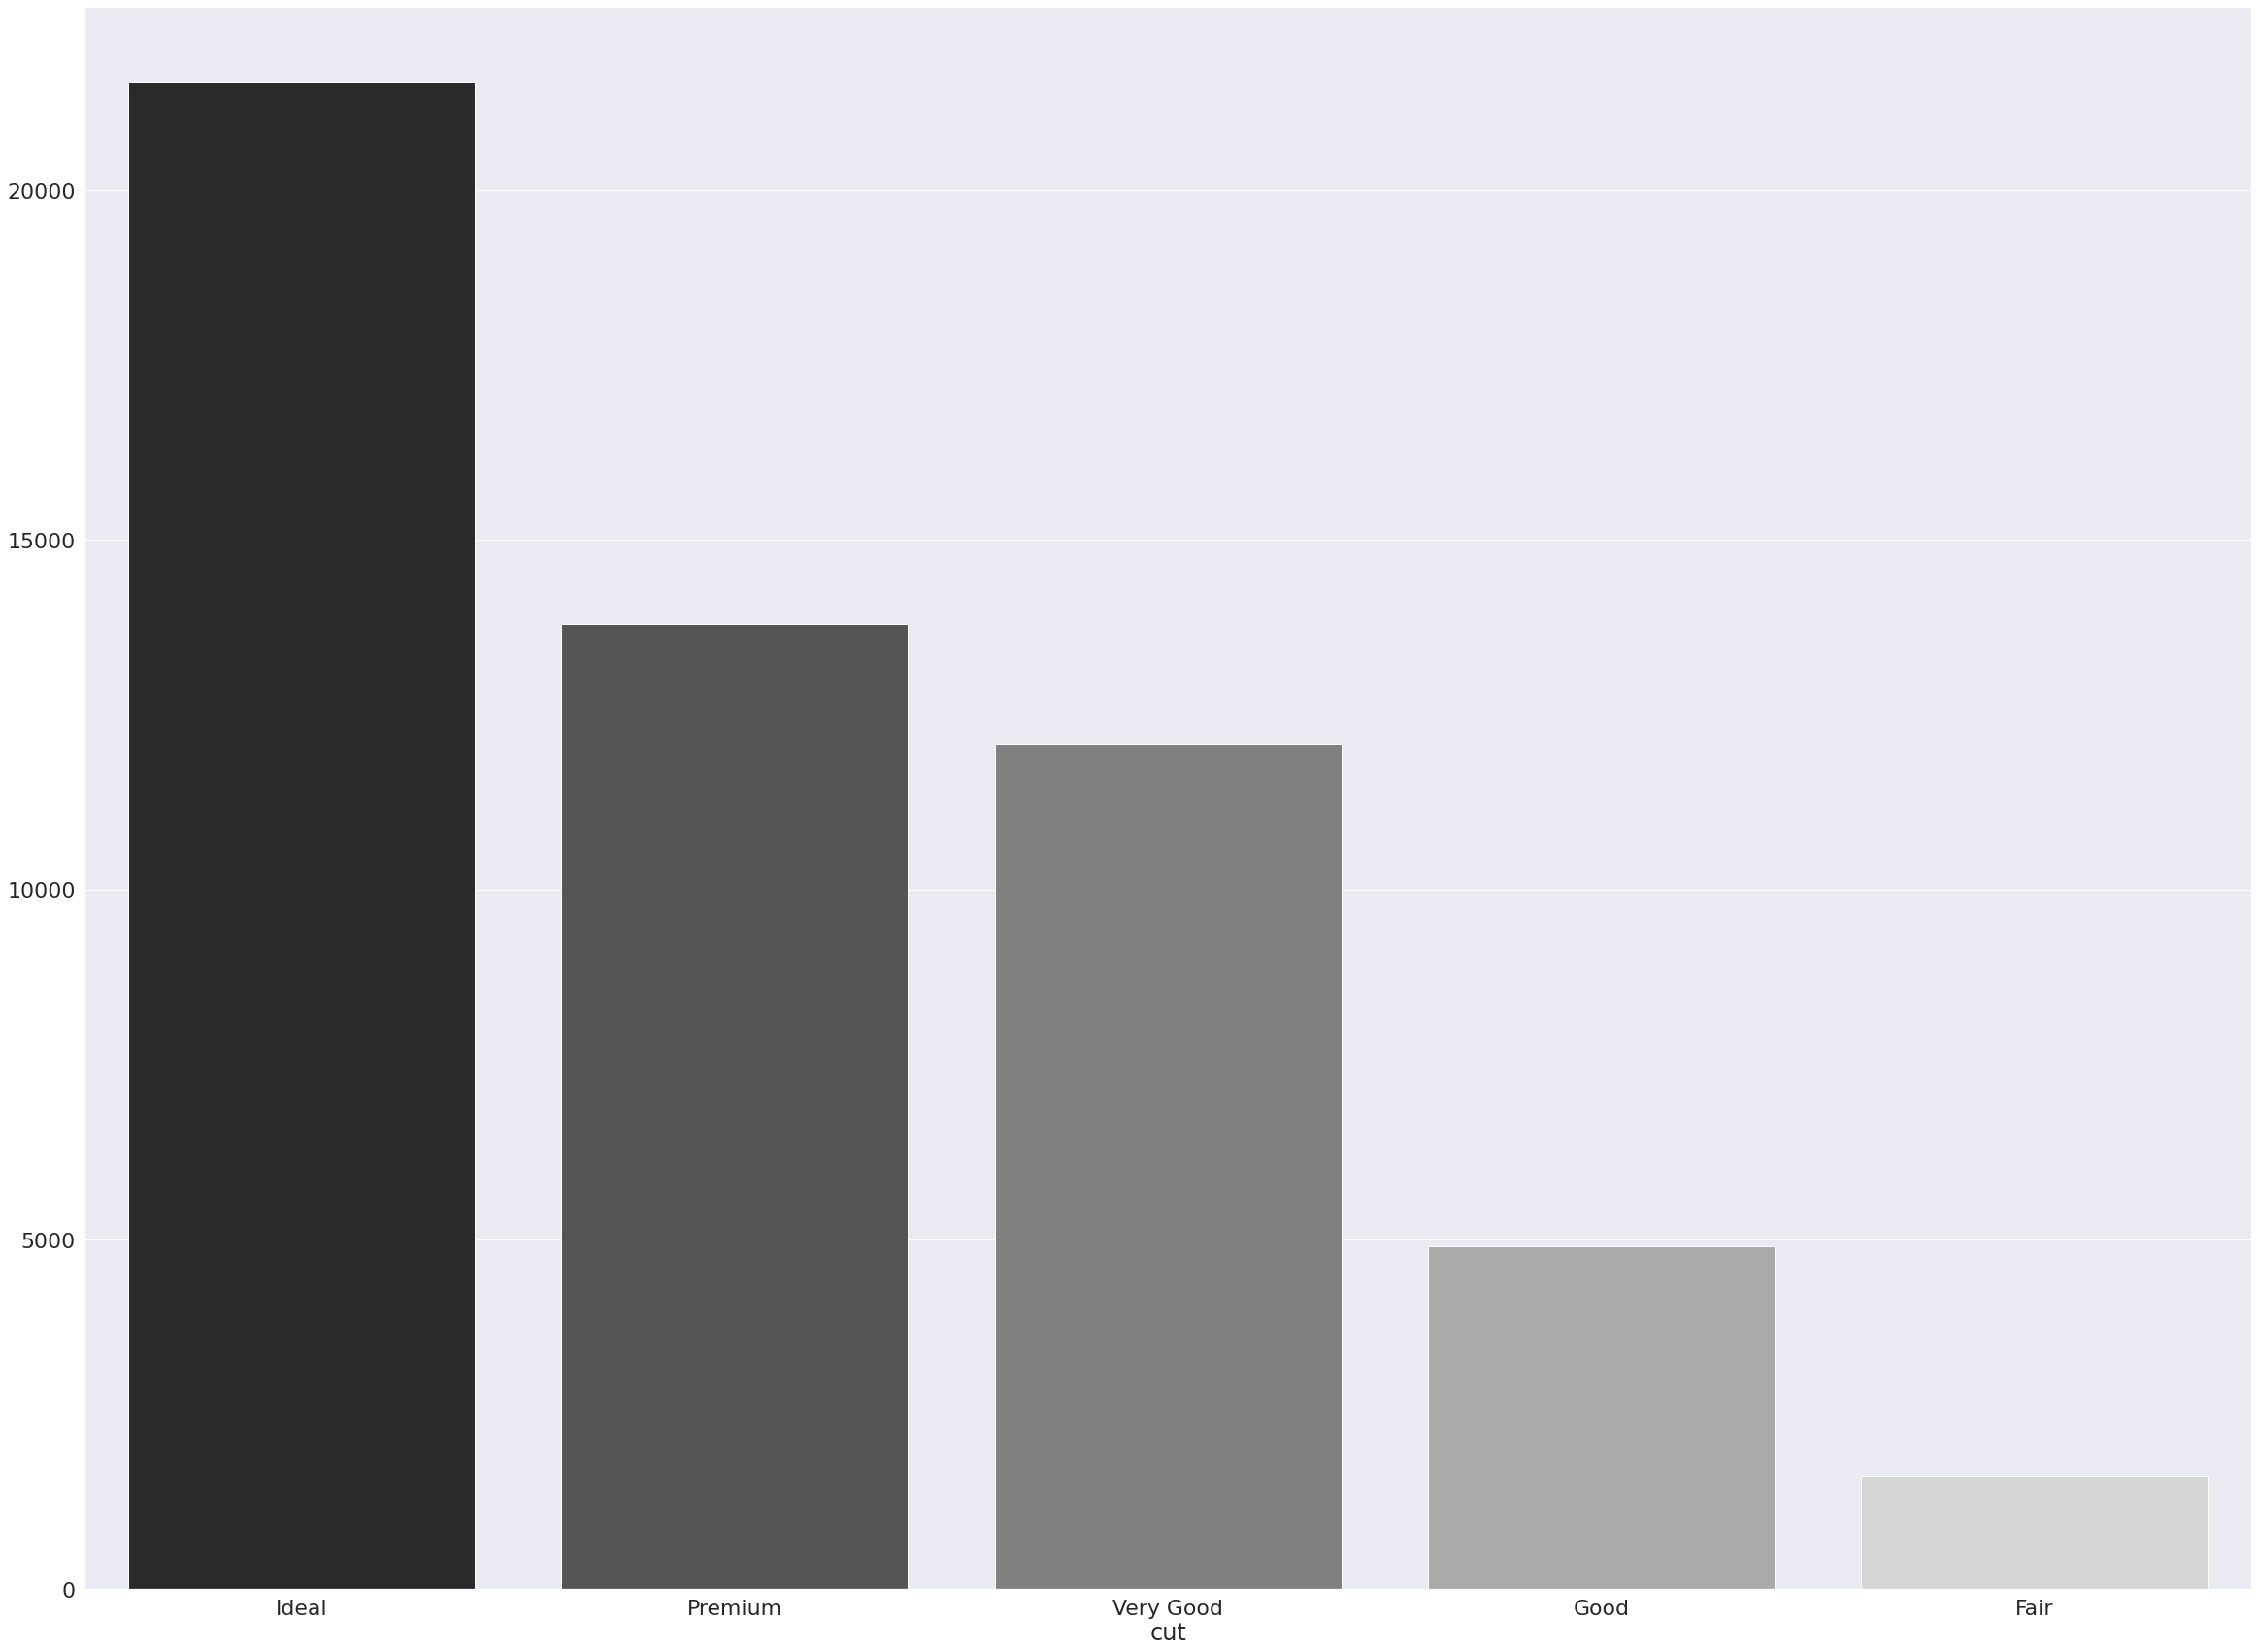

In [ ]:
sns.barplot(x=c.index, y=c.values, palette='gray');
sns.set(rc={'figure.figsize':(40,30)})
sns.set(font_scale=2)
plt.savefig('count-cut.png')

In [ ]:
c.head

<bound method NDFrame.head of cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64>

## In Diamond, which color we find majority of the time?

In [ ]:
c1 = d.groupby('color')['color'].count()

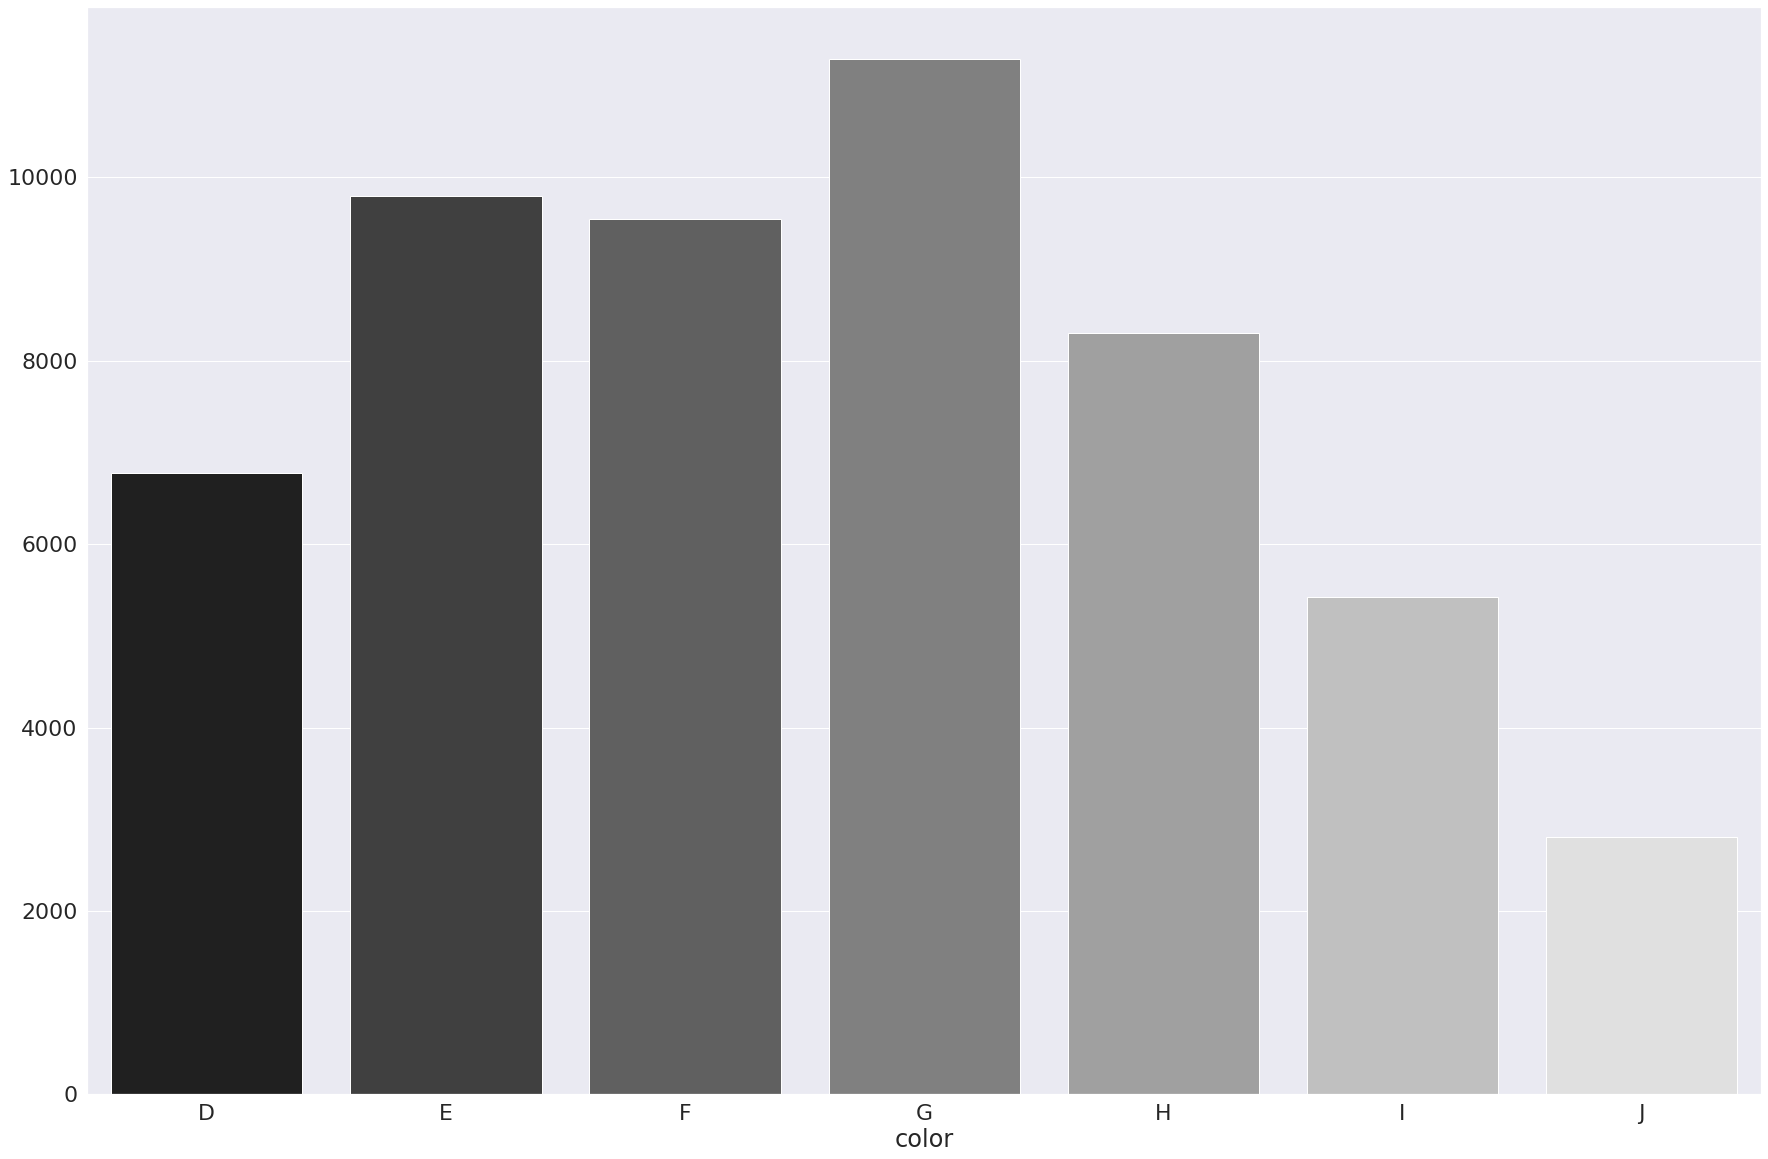

In [ ]:
sns.barplot(x=c1.index, y=c1.values, palette='gray');
sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale=2)

In [ ]:
c1

color
D     6775
E     9797
F     9542
G    11292
H     8304
I     5422
J     2808
Name: color, dtype: int64

## What can we say about Diamond clarity? (majority of the Diamondshave best clarity or not?)

In [ ]:
c2 = d.groupby('clarity')['clarity'].count()

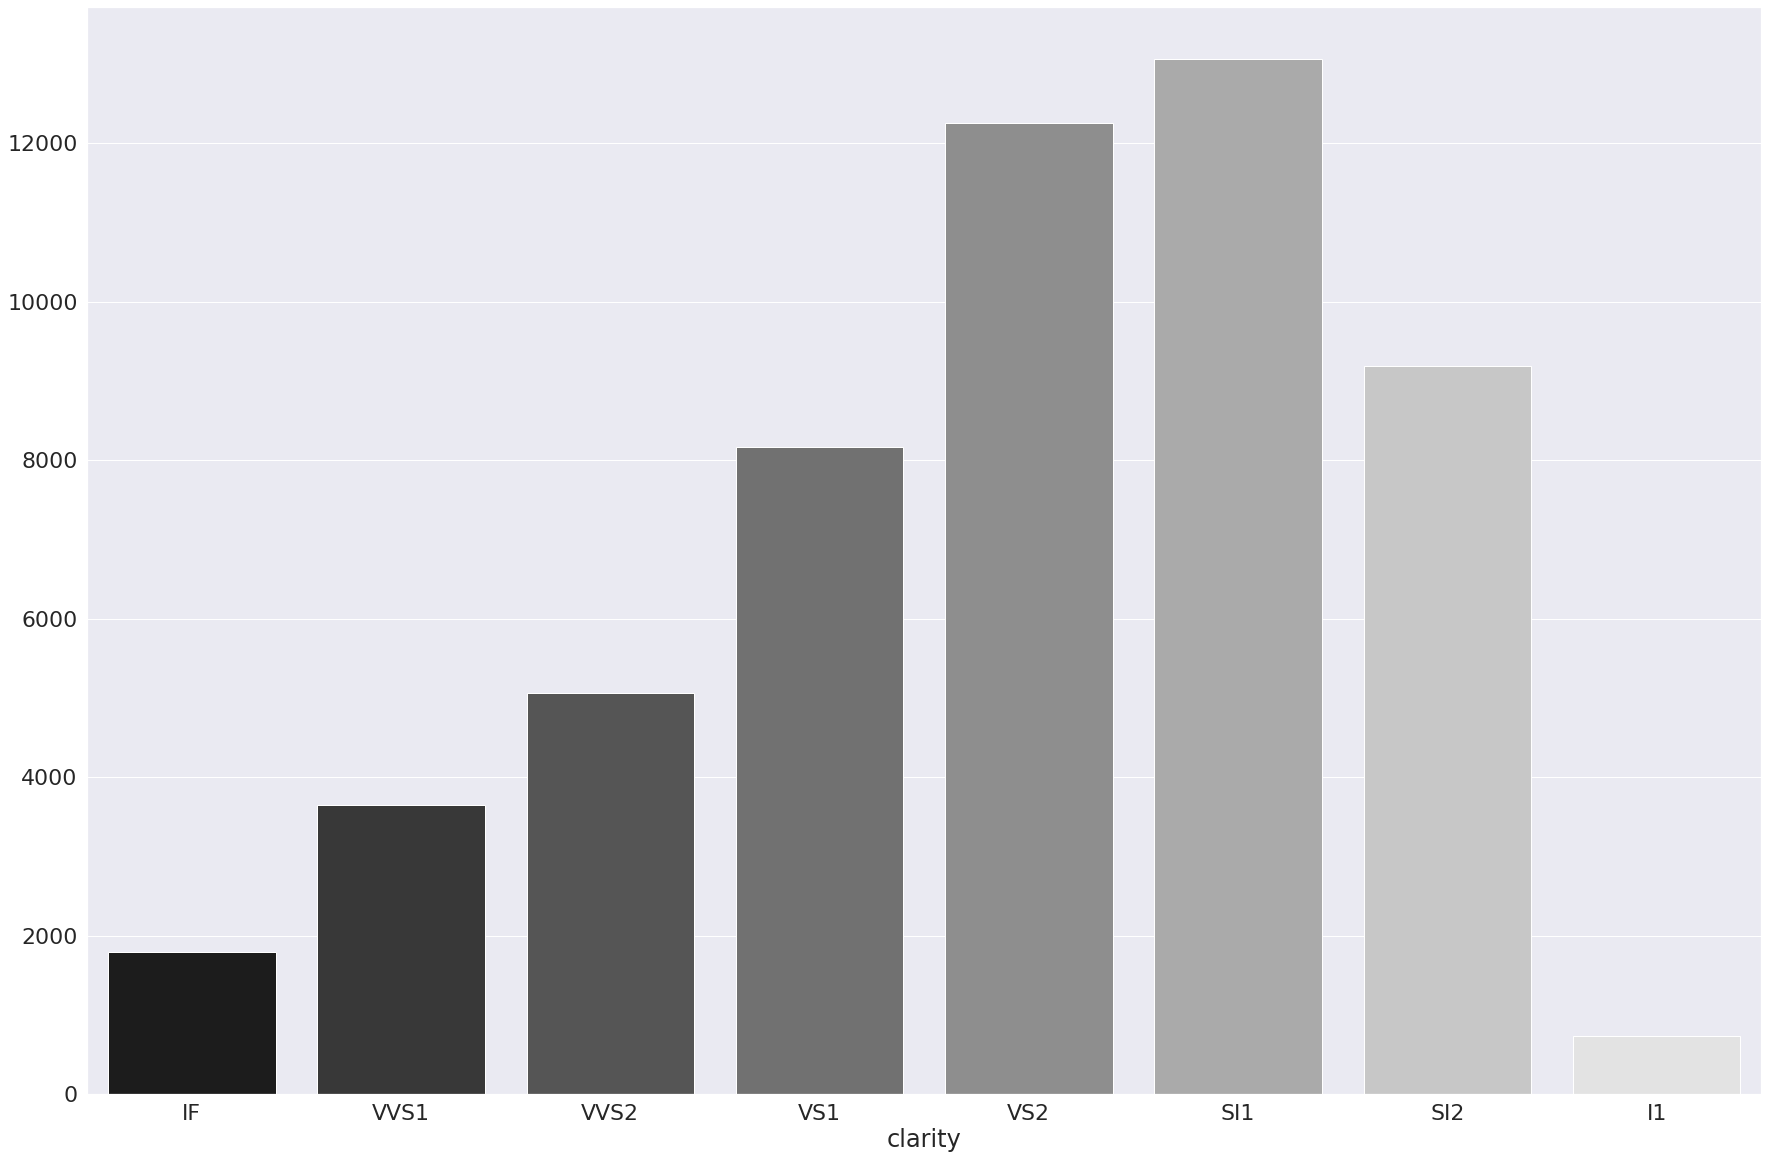

In [ ]:
sns.barplot(x=c2.index, y=c2.values, palette='gray');
sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale=2)

In [ ]:
c2

clarity
IF       1790
VVS1     3655
VVS2     5066
VS1      8171
VS2     12258
SI1     13065
SI2      9194
I1        741
Name: clarity, dtype: int64

The Majority Clarity is SI1

## Correlationbetween total depth and table

In [ ]:
correlation = d['depth'].corr(d['table'])
print(correlation)

-0.295778521526582


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


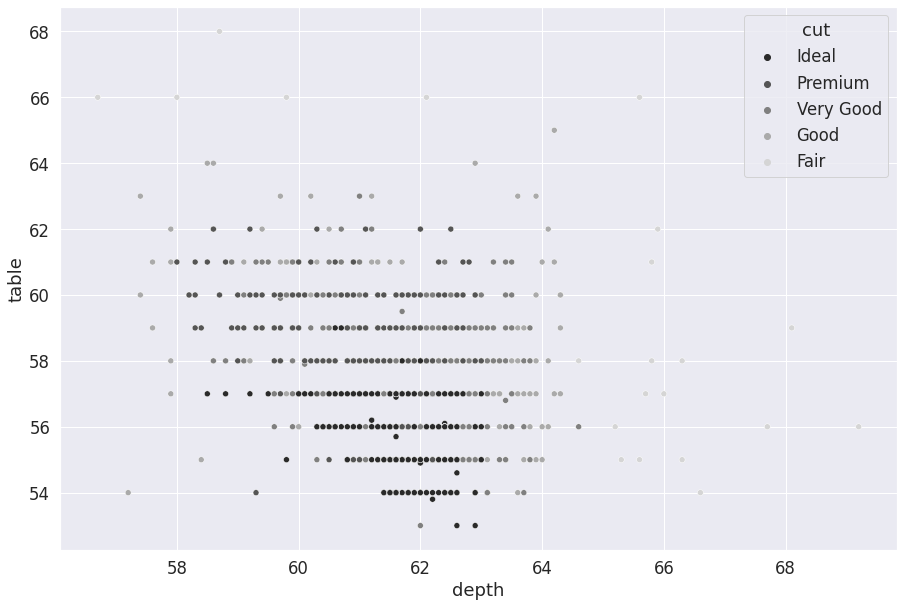

In [ ]:
sns.scatterplot('depth', 'table', data=d.sample(1000), hue = "cut", sizes = (100, 200, 300, 400, 500), palette = "gist_gray");
#sns.scatterplot(x=d.depth, y=d.table, palette='gray');
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale=1.5)
#plt.legend(loc='upper left');

## Range of the price

In [ ]:
print("The minimum value of price is:", d['price'].min(), "USD")
print("The maximum value of price is:", d['price'].max(), "USD")

The minimum value of price is: 326 USD
The maximum value of price is: 18823 USD


## Correlation of the price with all other variables:

### Correlation between Carat and Price

In [ ]:
cor1 = d['carat'].corr(d['price'])
print(cor1)

0.9215913011934771


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


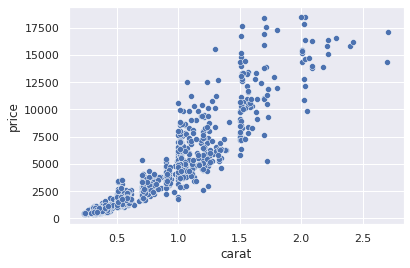

In [ ]:
sns.scatterplot('carat', 'price', data=d.sample(1000));

The Carat an price is highly corrlated

### Correlation between Depth (Total Depth) and Price

In [ ]:
cor2 = d['depth'].corr(d['price'])
print(cor2)

-0.010647404584142966


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


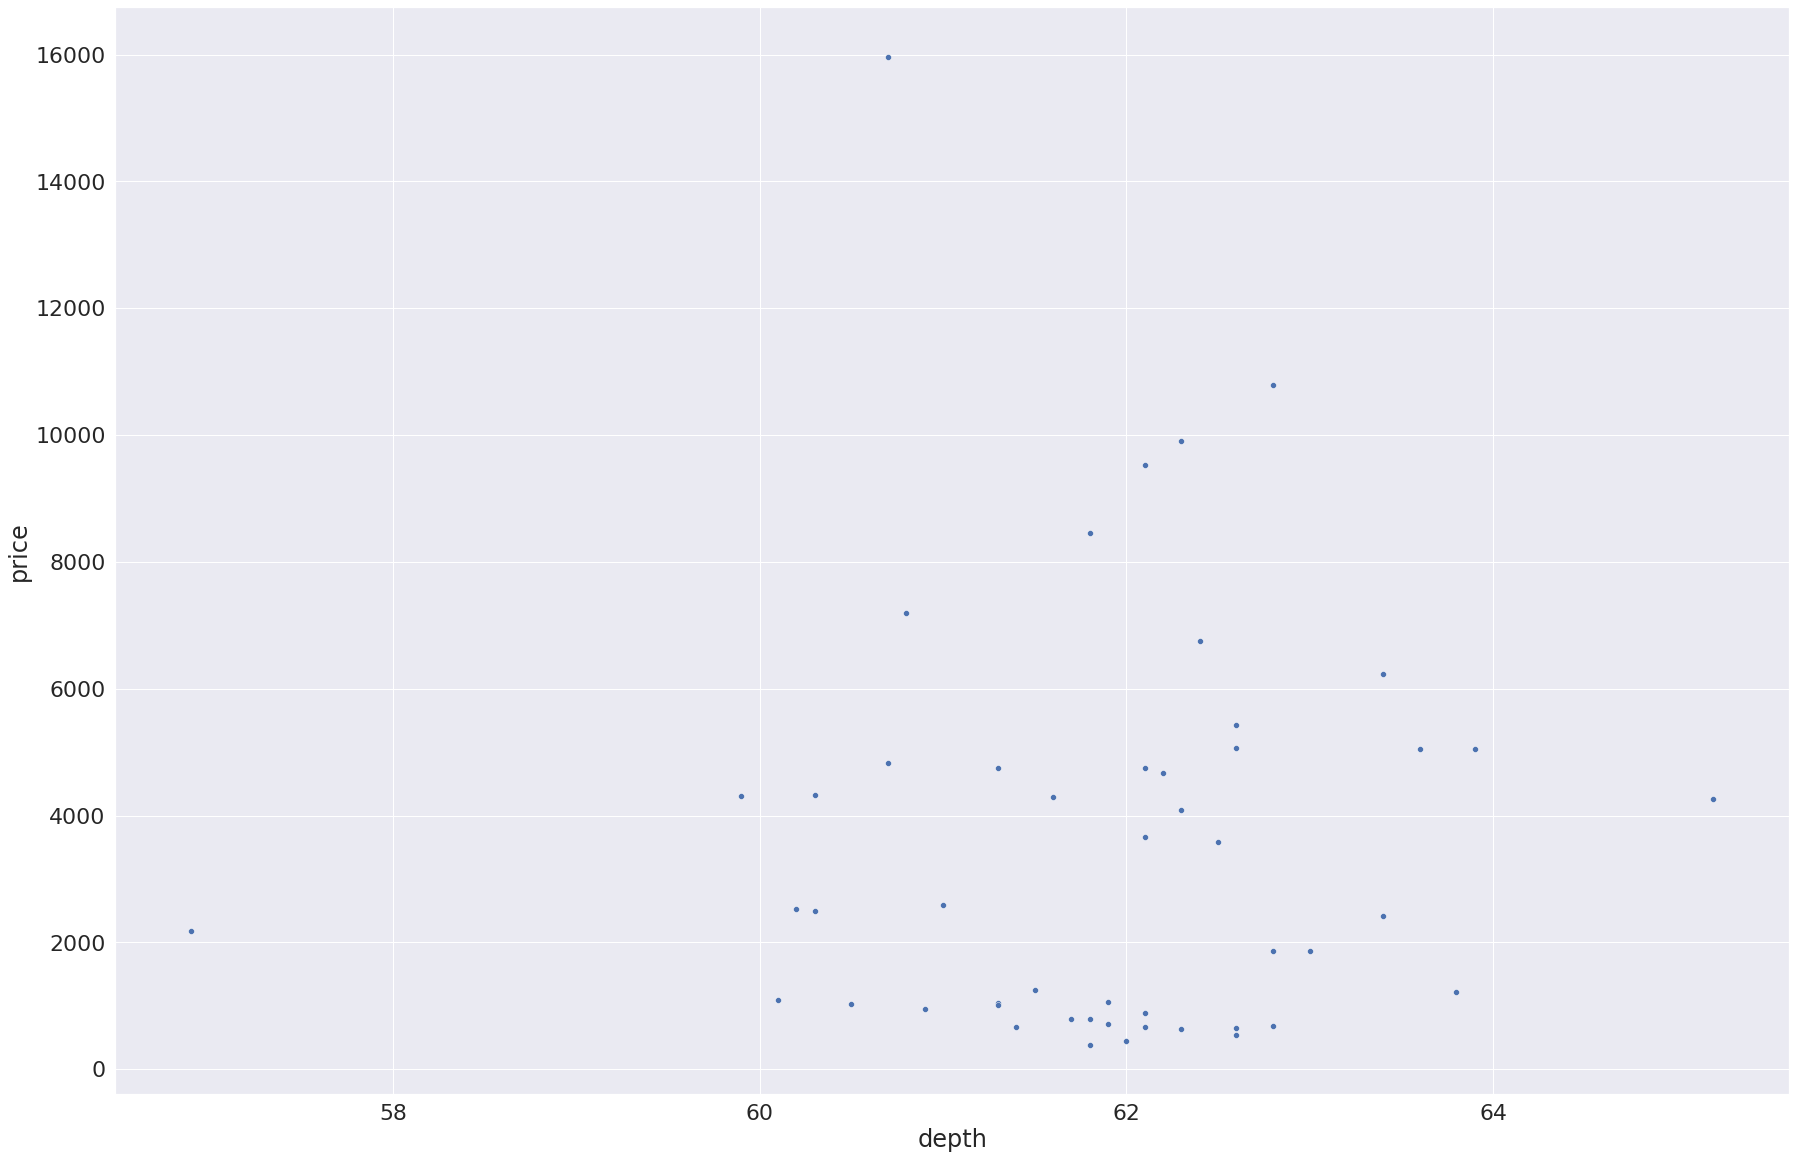

In [ ]:
sns.scatterplot('depth', 'price', data=d.sample(50));

### Correlation between table (width of top) and Price

In [ ]:
cor3 = d['table'].corr(d['price'])
print(cor3)

0.12713390212174194


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


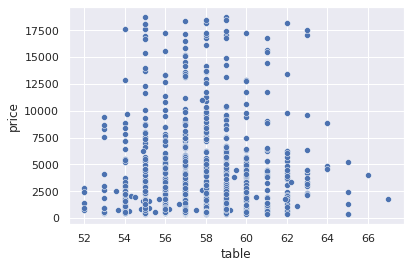

In [ ]:
sns.scatterplot('table', 'price', data=d.sample(1000));

### Correlation between x (Length) and Price

In [ ]:
cor4 = d['x'].corr(d['price'])
print(cor4)

0.8844351610161276


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


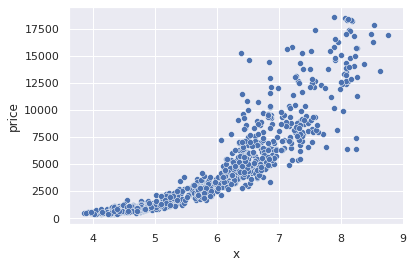

In [ ]:
sns.scatterplot('x', 'price', data=d.sample(1000));

### Correlation between y (width) and Price

In [ ]:
cor5 = d['y'].corr(d['price'])
print(cor5)

0.8654208978641869


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


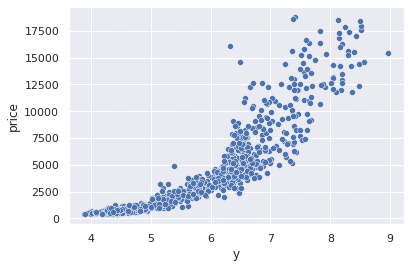

In [ ]:
sns.scatterplot('y', 'price', data=d.sample(1000));

### Correlation between z (depth) and Price

In [ ]:
cor6 = d['z'].corr(d['price'])
print(cor6)

0.8612494438514485


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


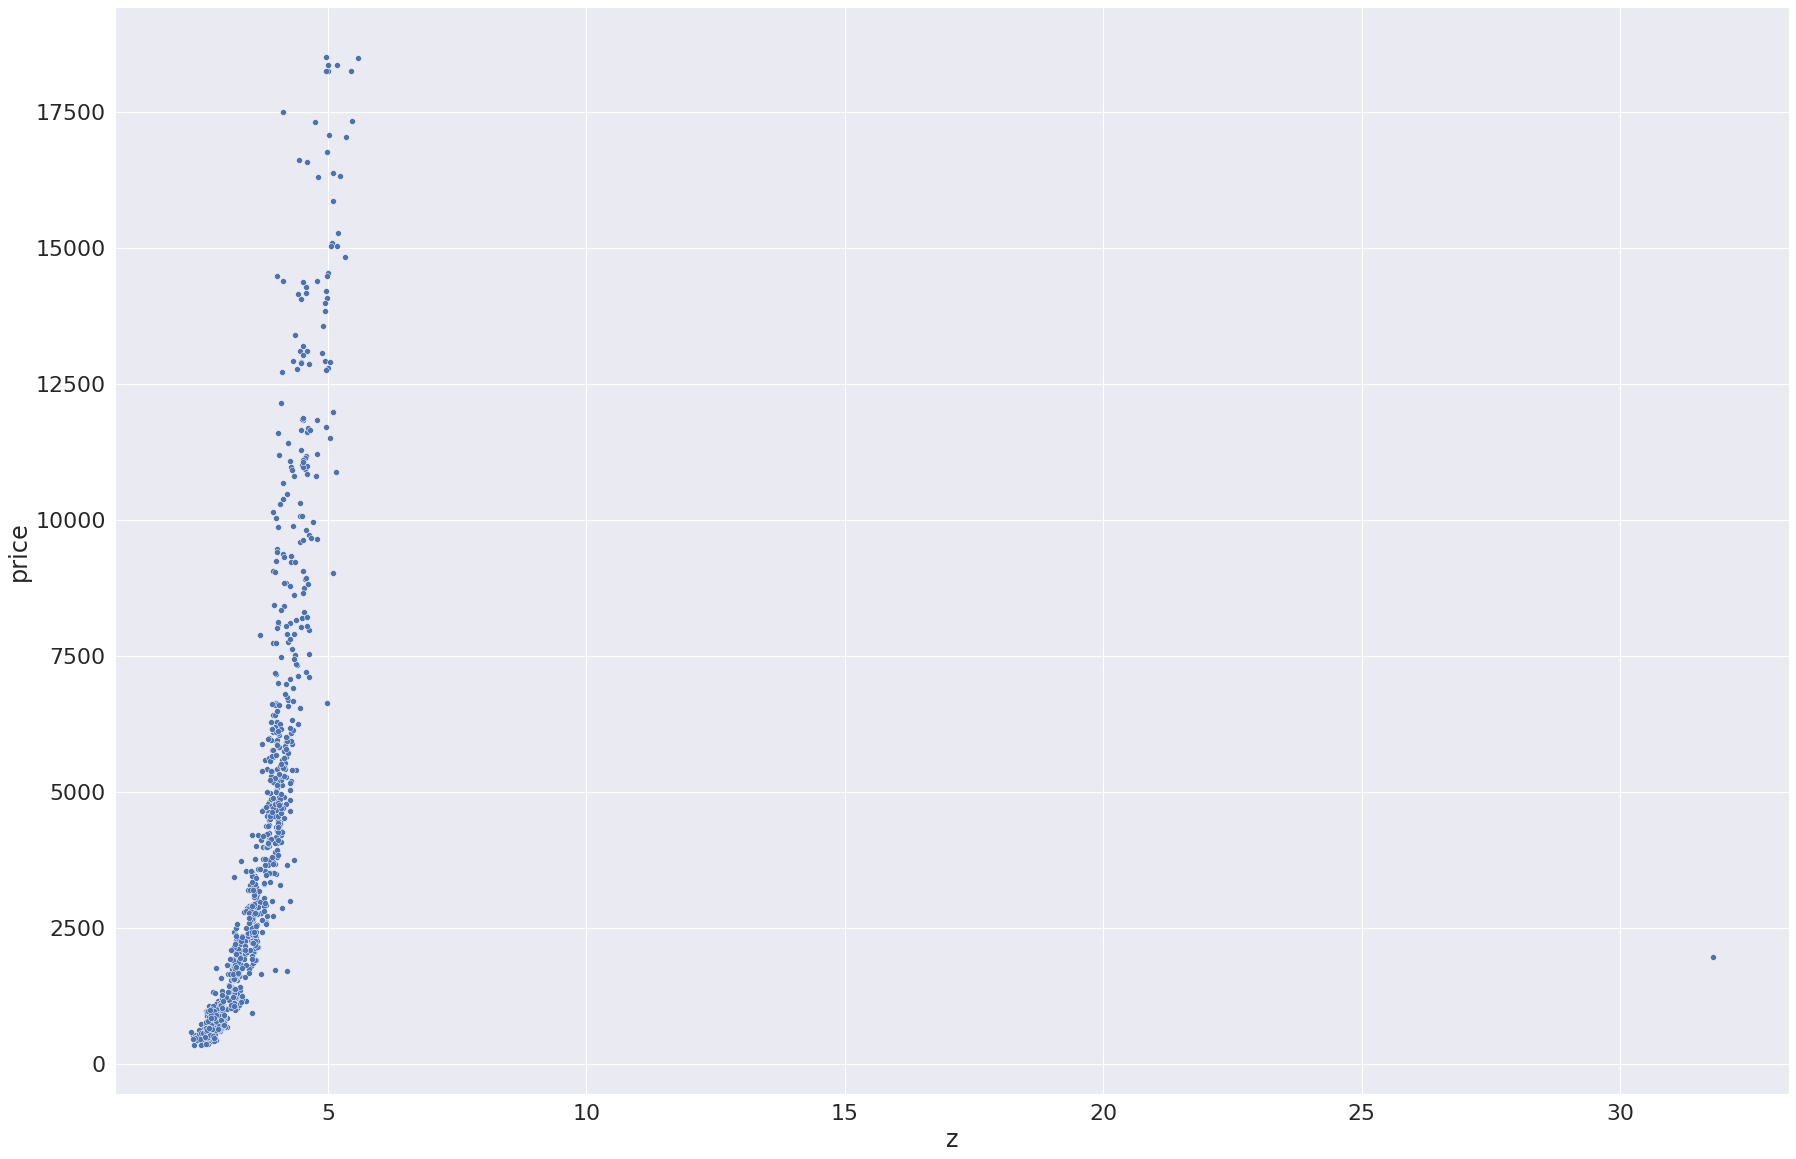

In [ ]:
sns.scatterplot('z', 'price', data=d.sample(1000));

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

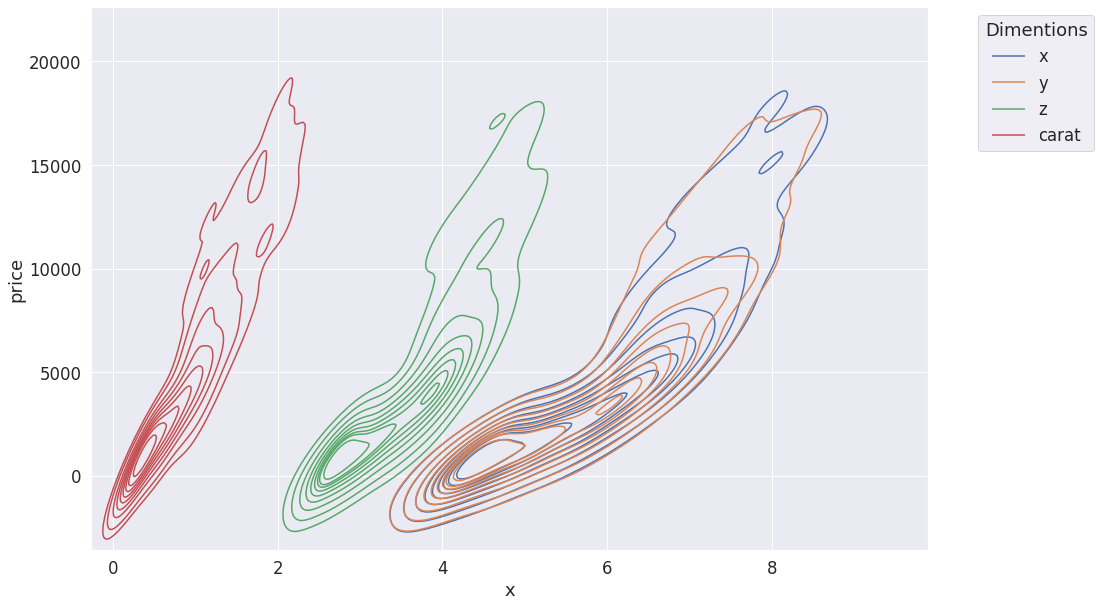

In [ ]:
#fig = plt.figure(figsize=(20,10))
sns.kdeplot('x', 'price', data=d.sample(1000), palette='gray');
sns.kdeplot('y', 'price', data=d.sample(1000), palette='gray');
sns.kdeplot('z', 'price', data=d.sample(1000), palette='gray');
sns.kdeplot('carat', 'price', data=d.sample(1000), palette='gray');
plt.legend(title='Dimentions', labels=['x', 'y', 'z', 'carat'], bbox_to_anchor=(1.05, 1), loc='upper left');

### Subplots

In [ ]:
df=d.sample(5)

In [ ]:
df

carat        cut color clarity  depth  table  price     x     y     z
36168   0.32      Ideal     F      IF   60.9   57.0    929  4.40  4.44  2.69
47777   0.60  Very Good     D     SI1   62.2   56.0   1896  5.40  5.44  3.37
1932    0.81    Premium     I    VVS2   62.9   59.0   3084  5.95  5.84  3.71
23320   1.55       Good     H     VS2   61.0   61.0  11364  7.42  7.47  4.54
44239   0.48      Ideal     G    VVS2   62.0   57.0   1574  5.01  5.04  3.11

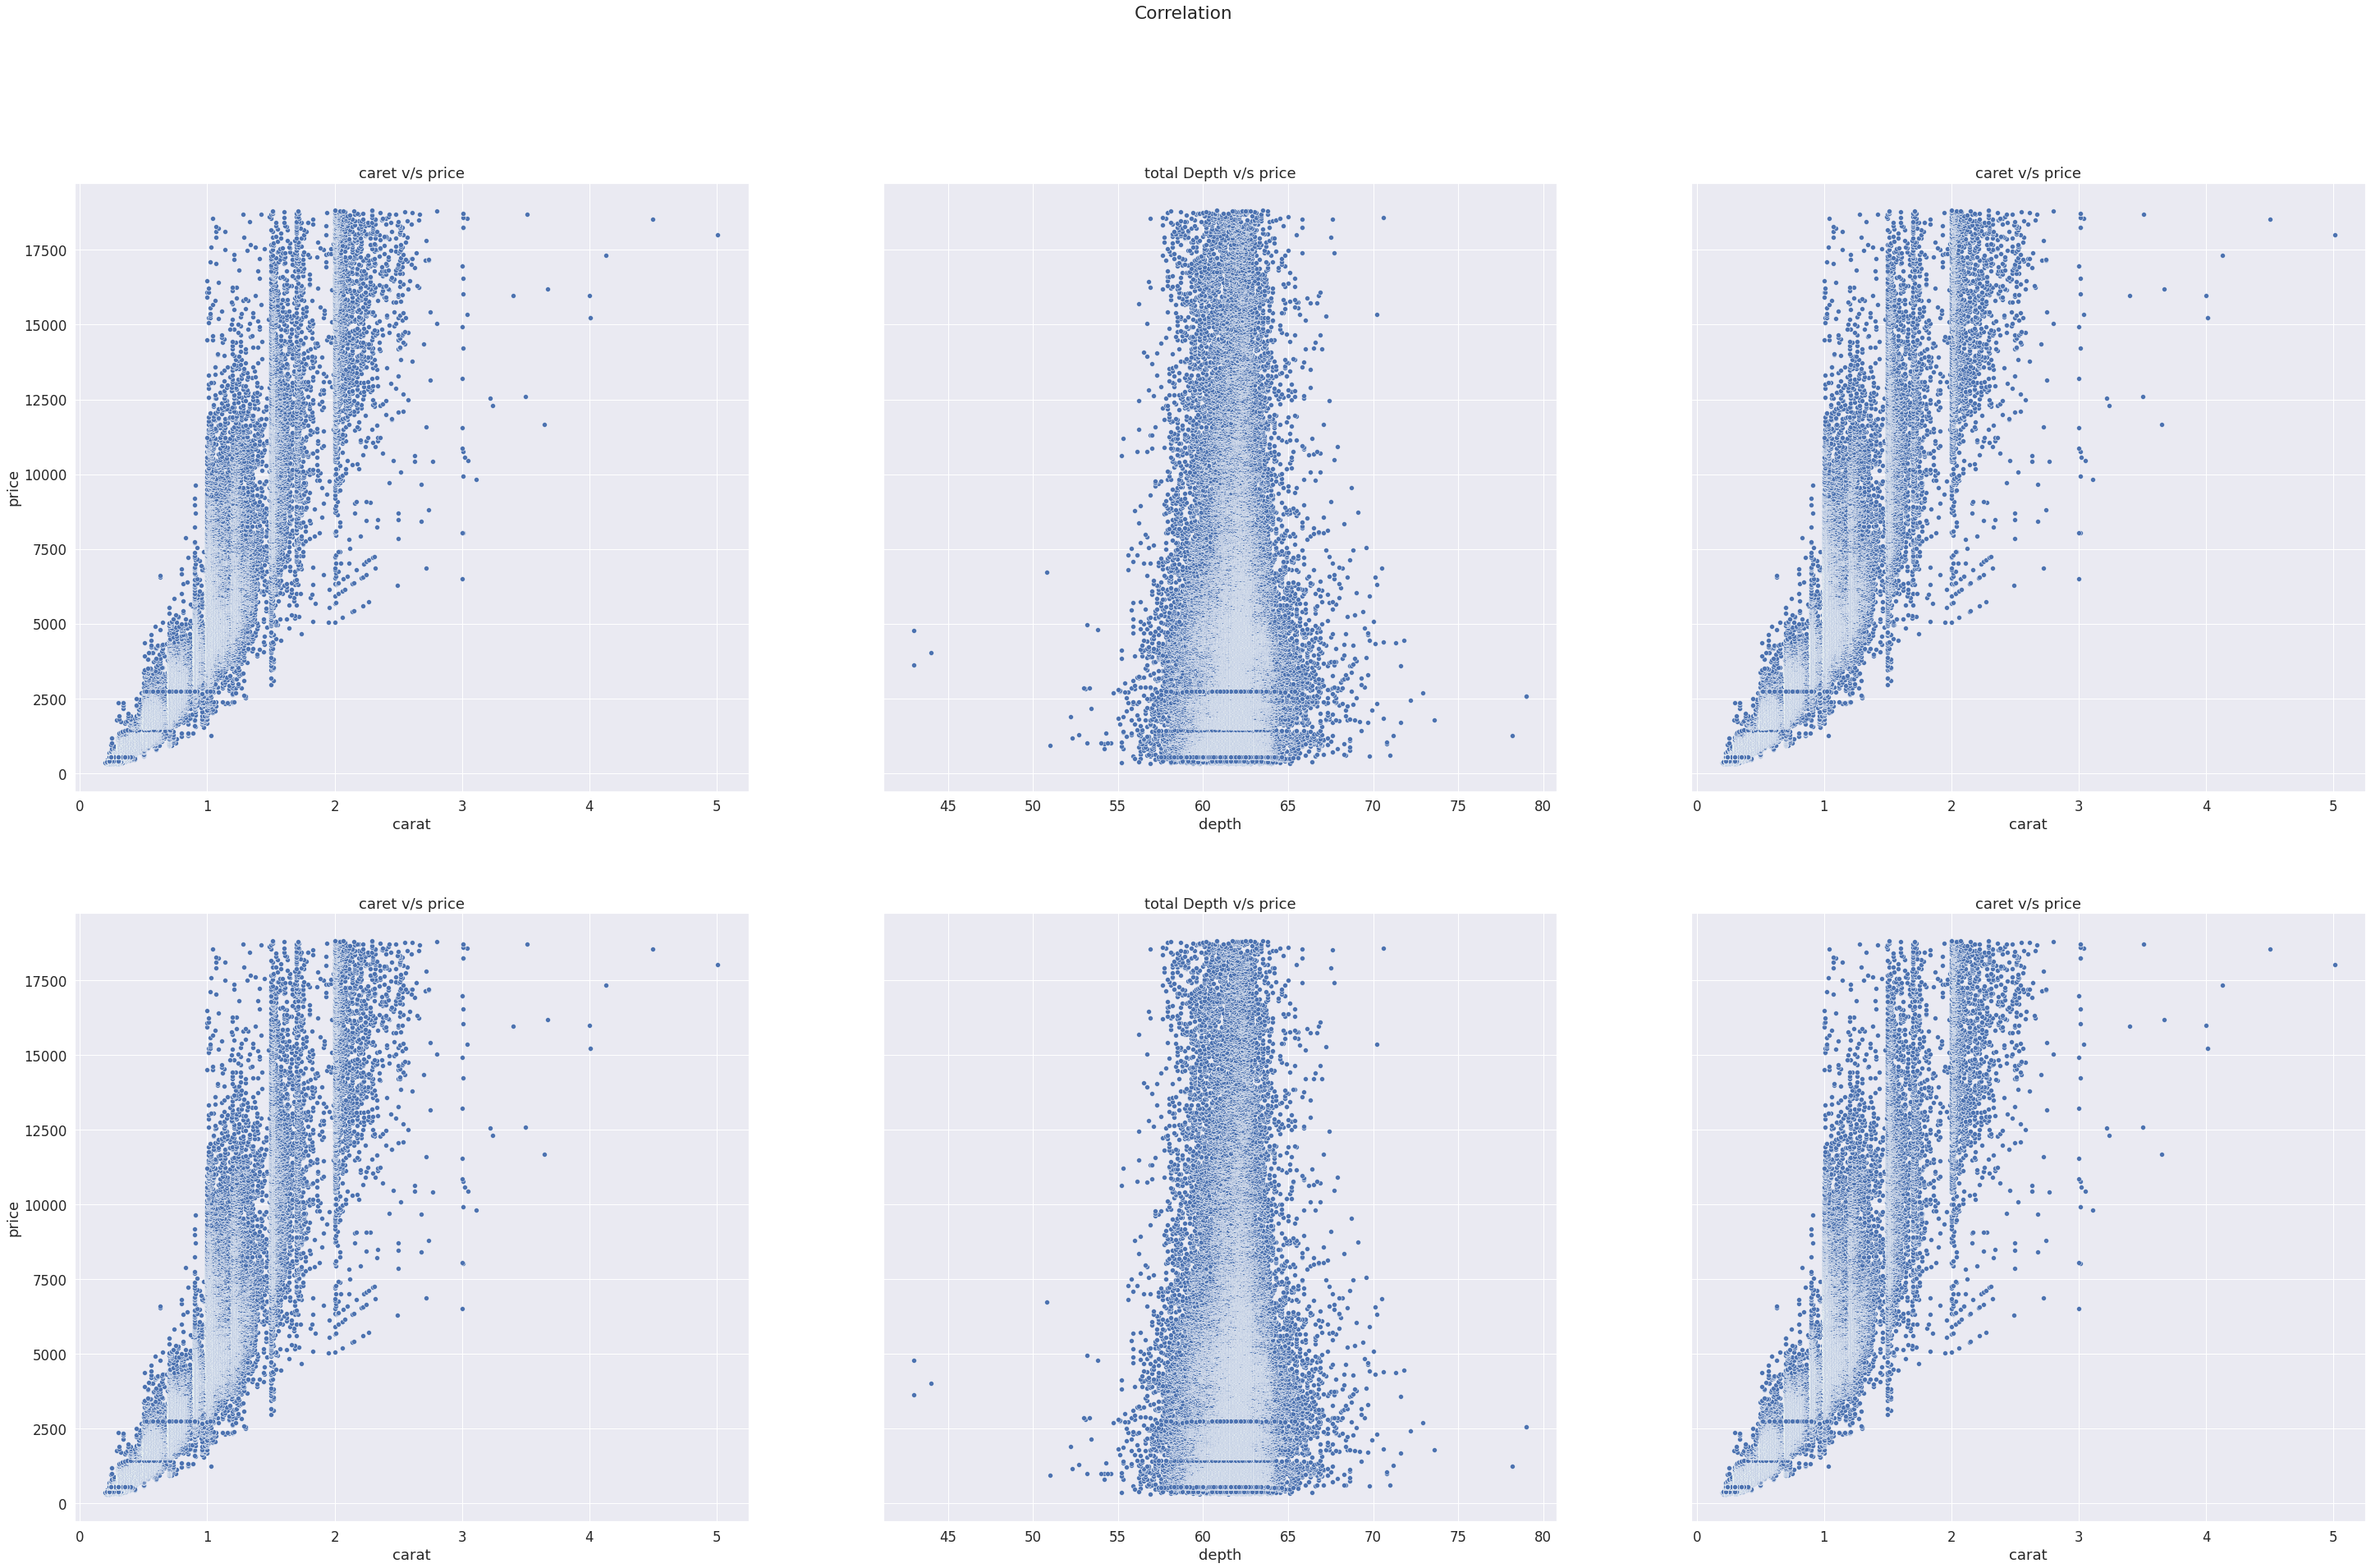

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(50, 30), sharey=True)
fig.suptitle('Correlation')

sns.scatterplot(ax=axes[0,0], data=df, x=d.carat, y=d.price);
axes[0,0].set_title("caret v/s price");

sns.scatterplot(ax=axes[0,1], x=d.depth, y=d.price, data=df);
axes[0,1].set_title("total Depth v/s price");

sns.scatterplot(ax=axes[0,2], x=d.carat, y=d.price, data=df);
axes[0,2].set_title("caret v/s price");

sns.scatterplot(ax=axes[1,0], data=df, x=d.carat, y=d.price);
axes[1,0].set_title("caret v/s price");

sns.scatterplot(ax=axes[1,1], x=d.depth, y=d.price, data=df);
axes[1,1].set_title("total Depth v/s price");

sns.scatterplot(ax=axes[1,2], x=d.carat, y=d.price, data=df);
axes[1,2].set_title("caret v/s price");

## Finding Outliers from each variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


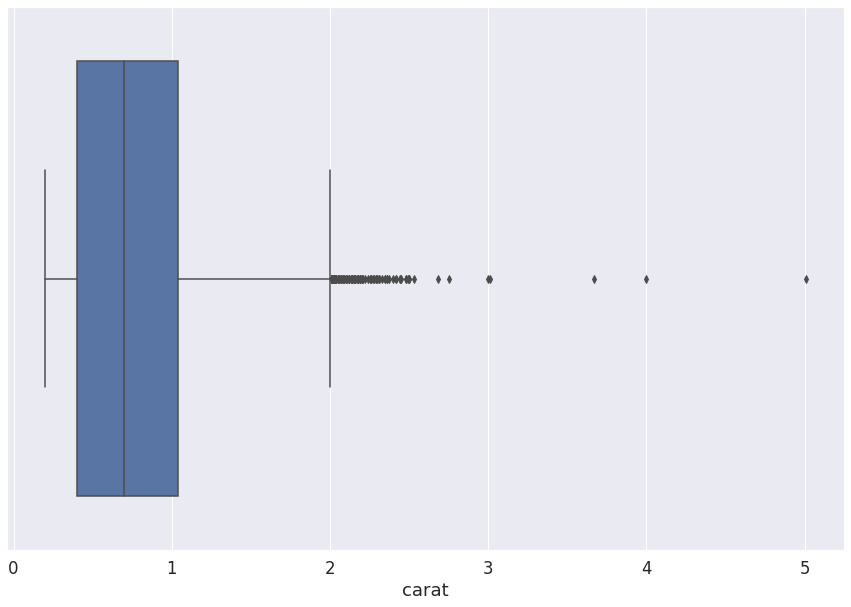

In [ ]:
sns.boxplot(d.sample(5000).carat);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


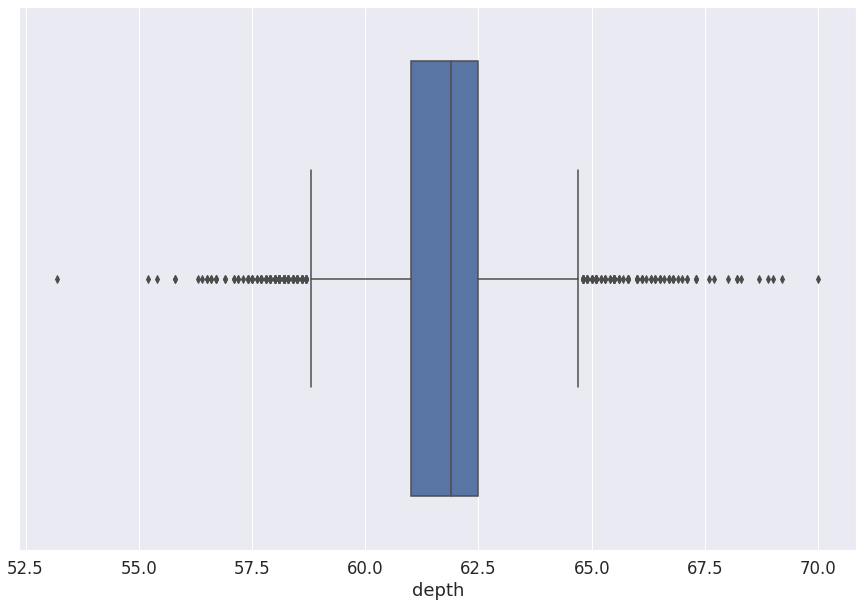

In [ ]:
sns.boxplot(d.sample(5000).depth);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


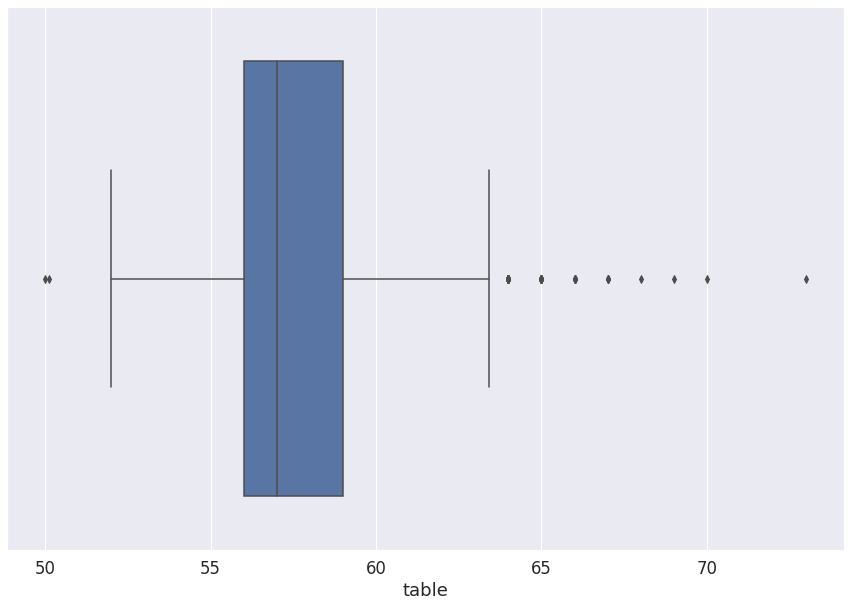

In [ ]:
sns.boxplot(d.sample(5000).table);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


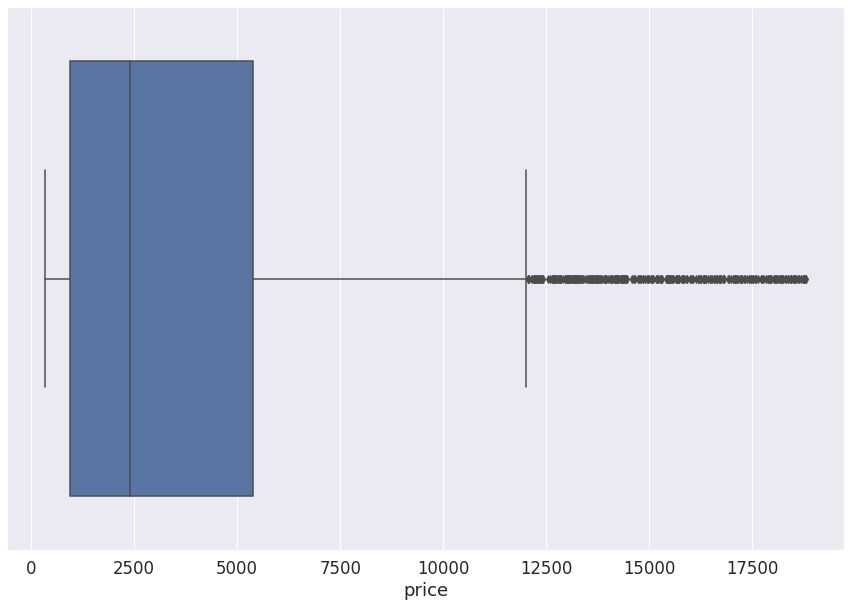

In [ ]:
sns.boxplot(d.sample(5000).price);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


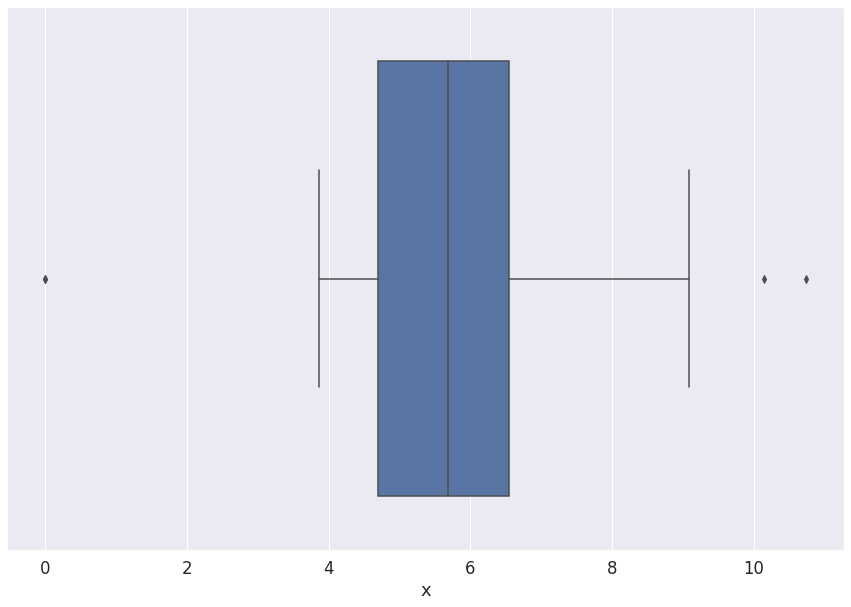

In [ ]:
sns.boxplot(d.sample(5000).x);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


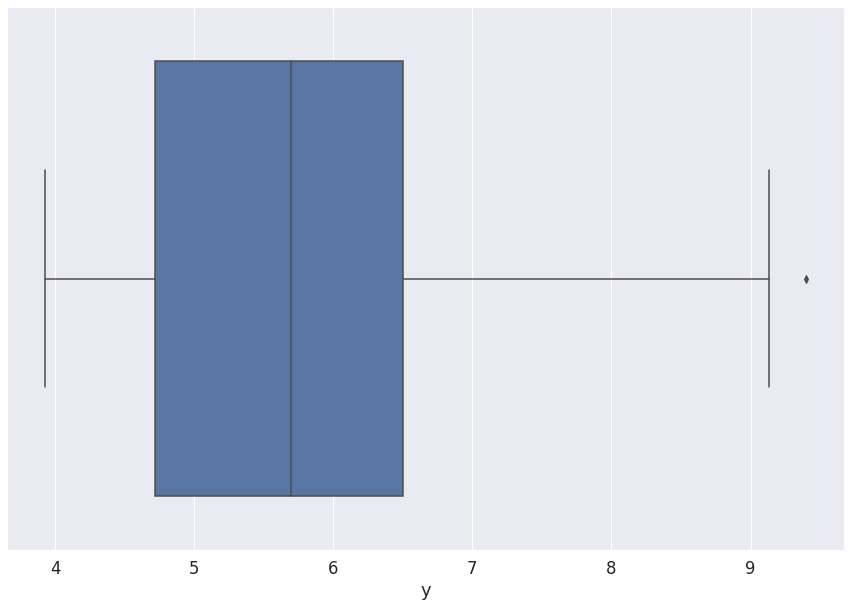

In [ ]:
sns.boxplot(d.sample(5000).y);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


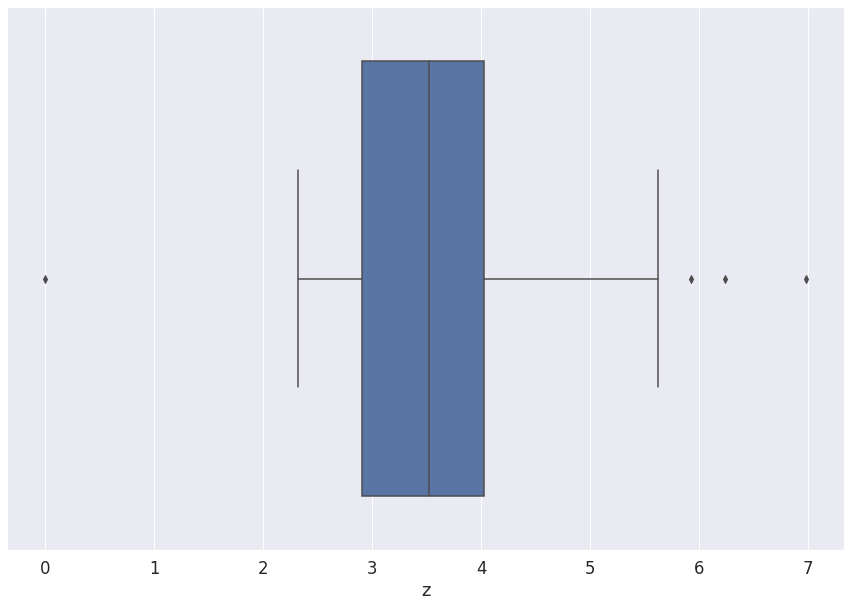

In [ ]:
sns.boxplot(d.sample(5000).z);

## Relation between "Cut" and "Price"

In [ ]:
d.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

### Cut - Ideal

In [ ]:
df1= d.copy()
df1 = df1[(df1['cut'] == 'Ideal')]

In [ ]:
df1.head()

carat    cut color clarity  depth  table  price     x     y     z
0    0.23  Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
11   0.23  Ideal     J     VS1   62.8   56.0    340  3.93  3.90  2.46
13   0.31  Ideal     J     SI2   62.2   54.0    344  4.35  4.37  2.71
16   0.30  Ideal     I     SI2   62.0   54.0    348  4.31  4.34  2.68
39   0.33  Ideal     I     SI2   61.8   55.0    403  4.49  4.51  2.78

In [ ]:
df1.shape

(21551, 10)

In [ ]:
df1.drop('carat', axis=1, inplace=True)

In [ ]:
df1.drop(['color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df1.head()

cut  price
0   Ideal    326
11  Ideal    340
13  Ideal    344
16  Ideal    348
39  Ideal    403

In [ ]:
df1.shape

(21551, 2)

In [ ]:
mean_ideal=np.mean(df1['price'])
mean_ideal

3457.541970210199

In [ ]:
median_ideal=np.median(df1['price'])
median_ideal

1810.0

In [ ]:
df1_ = df1.copy()
df1_ = df1_[(df1_['price'] > 1810.0)]

In [ ]:
df1_.head()

cut  price
90   Ideal   2757
92   Ideal   2757
102  Ideal   2760
104  Ideal   2760
105  Ideal   2760

In [ ]:
df1_.shape

(10774, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


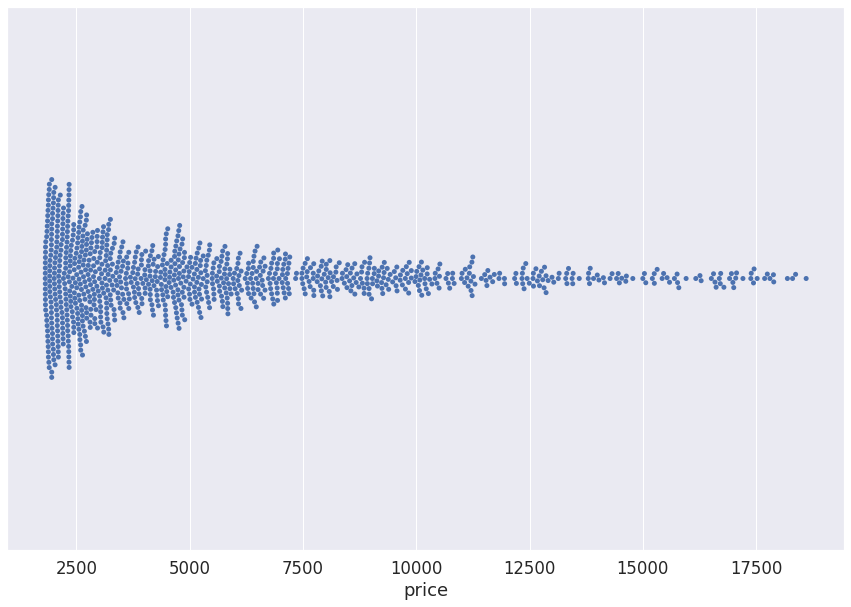

In [ ]:
sns.swarmplot(df1_.sample(1000).price);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


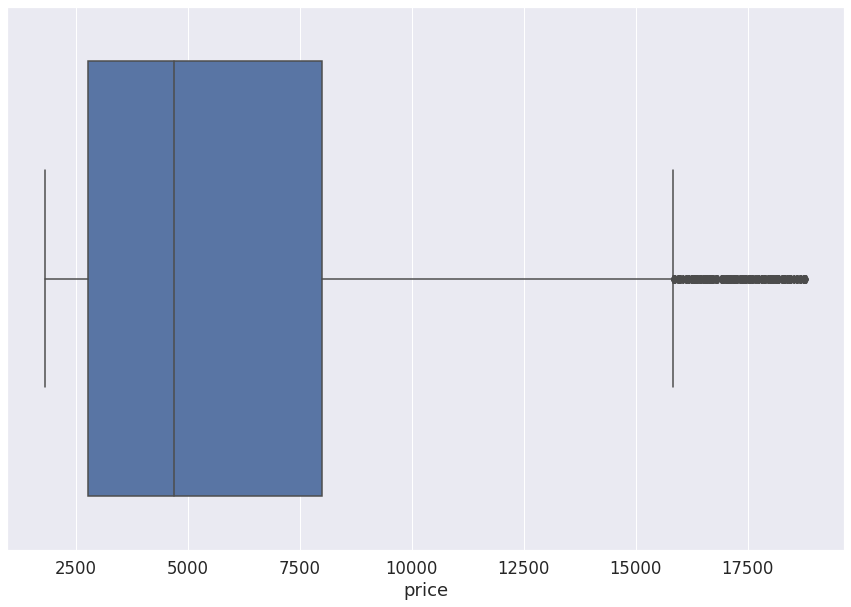

In [ ]:
sns.boxplot(df1_.price)

In [ ]:
max_ideal=np.max(df1['price'])
max_ideal

18806

In [ ]:
min_ideal=np.min(df1['price'])
min_ideal

326

In [ ]:
df1__ = df1.copy()
df1__ = df1__[(df1__['price'] > 15000.0)]

In [ ]:
df1__.shape

(531, 2)

### Cut - Premium

In [ ]:
df2= d.copy()
df2 = df2[(df2['cut'] == 'Premium')]

In [ ]:
df2.head()

carat      cut color clarity  depth  table  price     x     y     z
1    0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3    0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
12   0.22  Premium     F     SI1   60.4   61.0    342  3.88  3.84  2.33
14   0.20  Premium     E     SI2   60.2   62.0    345  3.79  3.75  2.27
15   0.32  Premium     E      I1   60.9   58.0    345  4.38  4.42  2.68

In [ ]:
df2.shape

(13791, 10)

In [ ]:
df2.drop(['color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df2.drop('carat', axis=1, inplace=True)

In [ ]:
df2.head()

cut  price
1   Premium    326
3   Premium    334
12  Premium    342
14  Premium    345
15  Premium    345

In [ ]:
df2.shape

(13791, 2)

In [ ]:
mean_premium=np.mean(df2['price'])
mean_premium

4584.2577042999055

In [ ]:
median_premium=np.median(df2['price'])
median_premium

3185.0

In [ ]:
df2_ = df2.copy()
df2_ = df2_[(df2_['price'] > 3185.0)]

In [ ]:
df2_.head()

cut  price
2444  Premium   3187
2456  Premium   3190
2458  Premium   3190
2459  Premium   3190
2475  Premium   3192

In [ ]:
df2_.shape

(6895, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


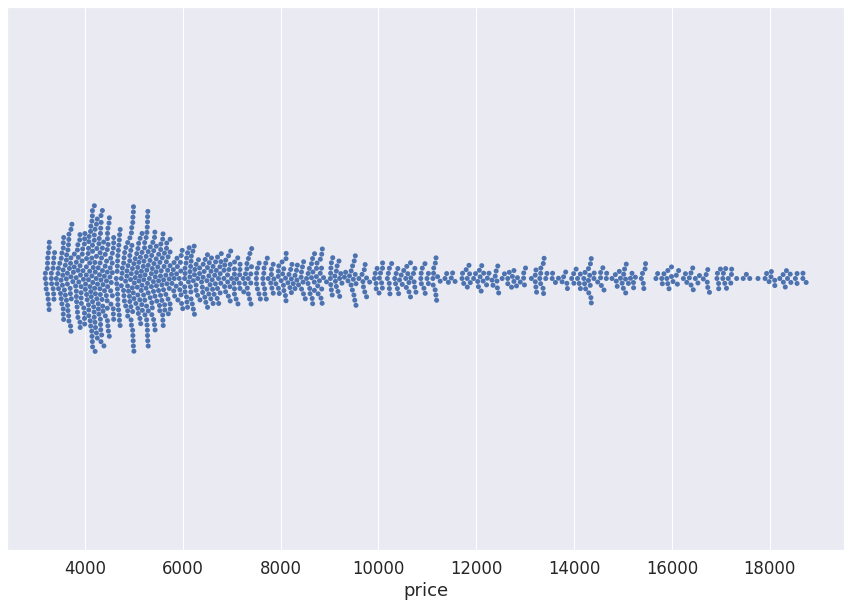

In [ ]:
sns.swarmplot(df2_.sample(1000).price);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


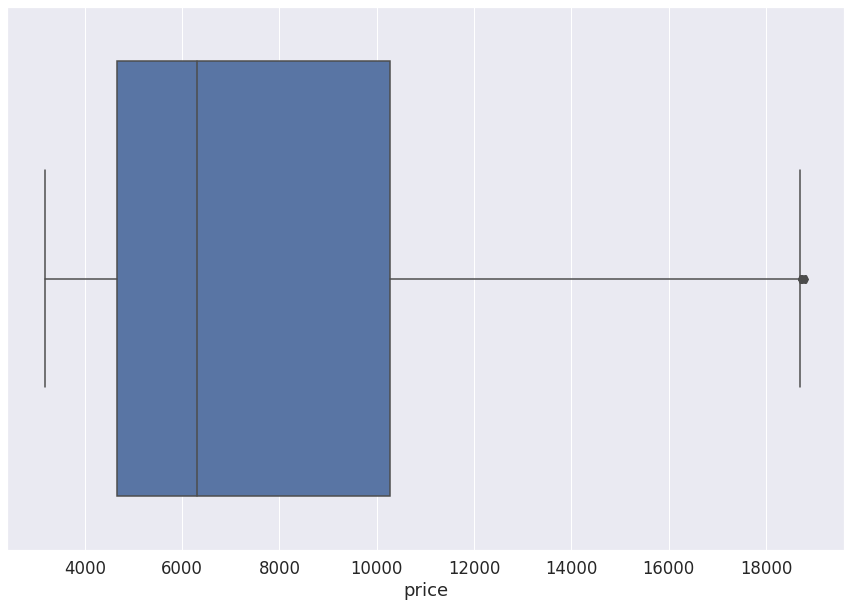

In [ ]:
sns.boxplot(df2_.price)

In [ ]:
max_premium=np.max(df2['price'])
max_premium

18823

In [ ]:
min_premium=np.min(df2['price'])
min_premium

326

In [ ]:
df2__ = df2.copy()
df2__ = df2__[(df2__['price'] > 15000.0)]

In [ ]:
df2__.shape

(587, 2)

### Cut - Good

In [ ]:
df3= d.copy()
df3 = df3[(df3['cut'] == 'Good')]

In [ ]:
df3.head()

carat   cut color clarity  depth  table  price     x     y     z
2    0.23  Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4    0.31  Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
10   0.30  Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73
17   0.30  Good     J     SI1   63.4   54.0    351  4.23  4.29  2.70
18   0.30  Good     J     SI1   63.8   56.0    351  4.23  4.26  2.71

In [ ]:
df3.shape

(4906, 10)

In [ ]:
df3.drop(['carat', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df3.head()

cut  price
2   Good    327
4   Good    335
10  Good    339
17  Good    351
18  Good    351

In [ ]:
mean_good=np.mean(df3['price'])
mean_good

3928.864451691806

In [ ]:
median_good=np.median(df3['price'])
median_good

3050.5

In [ ]:
df3_ = df3.copy()
df3_ = df3_[(df3_['price'] > 3050.5)]

In [ ]:
df3_.head()

cut  price
1790  Good   3051
1820  Good   3057
1821  Good   3057
1823  Good   3058
1830  Good   3060

In [ ]:
df3_.shape

(2453, 2)

In [ ]:
max_good=np.max(df3['price'])
max_good

18788

In [ ]:
min_good=np.min(df3['price'])
min_good

327

In [ ]:
df3__ = df3.copy()
df3__ = df3__[(df3__['price'] > 15000.0)]

In [ ]:
df3__.shape

(129, 2)

### Cut - Very Good

In [ ]:
df4= d.copy()
df4 = df4[(df4['cut'] == 'Very Good')]

In [ ]:
df4.head()

carat        cut color clarity  depth  table  price     x     y     z
5    0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6    0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7    0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
9    0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39
19   0.30  Very Good     J     SI1   62.7   59.0    351  4.21  4.27  2.66

In [ ]:
df4.shape

(12082, 10)

In [ ]:
df4.drop(['carat', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df4.head()

cut  price
5   Very Good    336
6   Very Good    336
7   Very Good    337
9   Very Good    338
19  Very Good    351

In [ ]:
mean_verygood=np.mean(df4['price'])
mean_verygood

3981.7598907465654

In [ ]:
median_verygood=np.median(df4['price'])
median_verygood

2648.0

In [ ]:
df4_ = df4.copy()
df4_ = df4_[(df4_['price'] > 2648)]

In [ ]:
df4_.head()

cut  price
93   Very Good   2759
94   Very Good   2759
98   Very Good   2760
100  Very Good   2760
113  Very Good   2762

In [ ]:
df4_.shape

(6041, 2)

In [ ]:
max_very_good=np.max(df4['price'])
max_very_good

18818

In [ ]:
min_very_good=np.min(df4['price'])
min_very_good

336

In [ ]:
df4__ = df4.copy()
df4__ = df4__[(df4__['price'] > 15000)]

In [ ]:
df4__.shape

(367, 2)

### Cut - Fair

In [ ]:
df5= d.copy()
df5 = df5[(df5['cut'] == 'Fair')]

In [ ]:
df5.head()

carat   cut color clarity  depth  table  price     x     y     z
8     0.22  Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
91    0.86  Fair     E     SI2   55.1   69.0   2757  6.45  6.33  3.52
97    0.96  Fair     F     SI2   66.3   62.0   2759  6.27  5.95  4.07
123   0.70  Fair     F     VS2   64.5   57.0   2762  5.57  5.53  3.58
124   0.70  Fair     F     VS2   65.3   55.0   2762  5.63  5.58  3.66

In [ ]:
df5.shape

(1610, 10)

In [ ]:
df5.drop(['carat', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df5.head()

cut  price
8    Fair    337
91   Fair   2757
97   Fair   2759
123  Fair   2762
124  Fair   2762

In [ ]:
mean_fair=np.mean(df5['price'])
mean_fair

4358.757763975155

In [ ]:
median_fair=np.median(df5['price'])
median_fair

3282.0

In [ ]:
df5_ = df5.copy()
df5_ = df5_[(df5_['price'] > 3282)]

In [ ]:
df5_.head()

cut  price
2913  Fair   3285
2926  Fair   3288
2934  Fair   3290
2948  Fair   3294
2959  Fair   3296

In [ ]:
df5_.shape

(804, 2)

In [ ]:
df5__ = df5.copy()
df5__ = df5__[(df5__['price'] > 15000)]

In [ ]:
df5__.head()

cut  price
25899  Fair  15030
25966  Fair  15152
26066  Fair  15282
26091  Fair  15330
26099  Fair  15351

In [ ]:
df5__.shape

(41, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


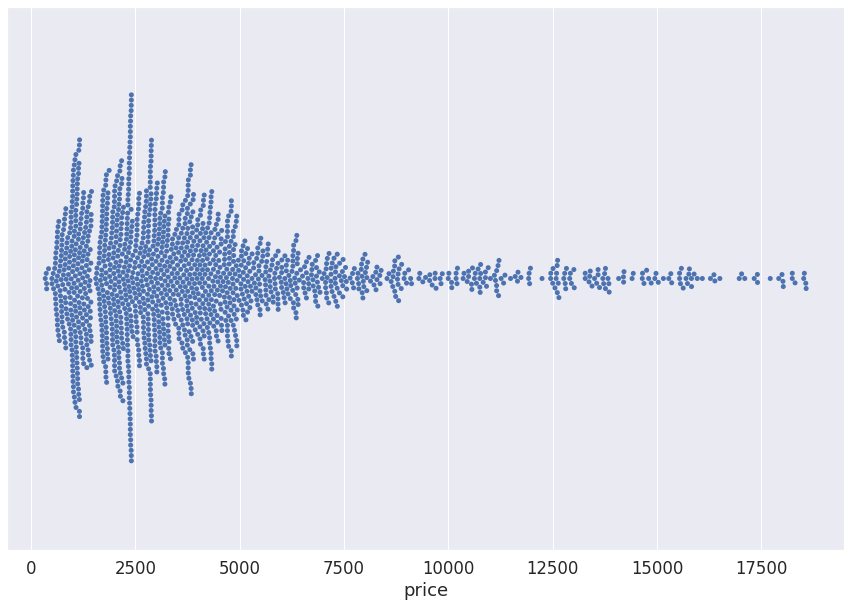

In [ ]:
sns.swarmplot(df5.price);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


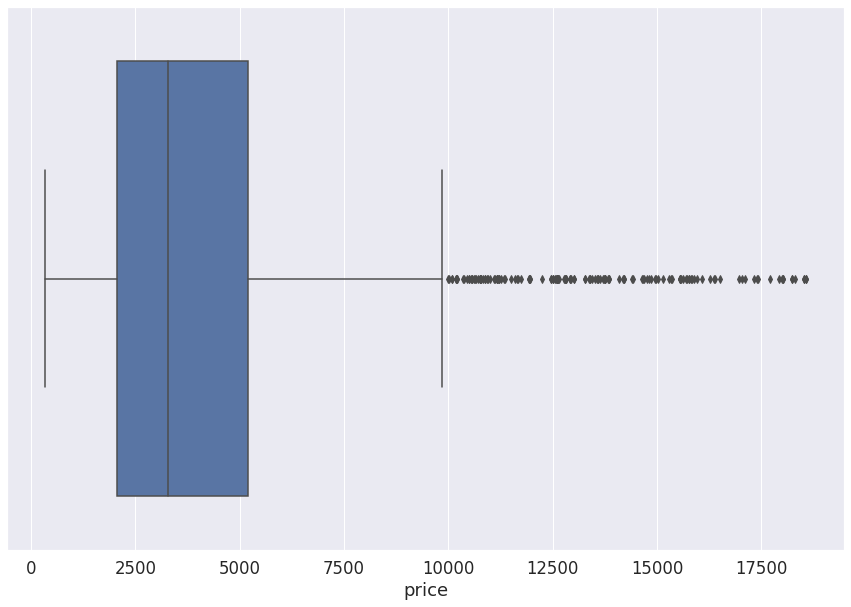

In [ ]:
sns.boxplot(df5.price)

In [ ]:
max_fair=np.max(df5['price'])
max_fair

18574

In [ ]:
min_fair=np.min(df5['price'])
min_fair

337

### Summary of relation between "Cut" and "Price"

In [ ]:
cut_mean = pd.Series([mean_ideal, mean_premium, mean_good, mean_verygood, mean_fair], 
                 index=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'])
cut_median = pd.Series([median_ideal, median_premium, median_good, median_verygood, median_fair], 
                     index=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'])
cut_max = pd.Series([max_ideal, max_premium, max_good, max_very_good, max_fair], 
                     index=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'])
cut_min = pd.Series([min_ideal, min_premium, min_good, min_very_good, min_fair], 
                     index=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'])
cut_total_dimonds = pd.Series([21551, 13791, 4906, 12082, 1610], 
                     index=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'])
# Dimonds worth of cost of 15000 USD or more
cut_costly_dimonds = pd.Series([531, 587, 129, 367, 41], 
                     index=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'])

In [ ]:
cut_summary = pd.DataFrame({'Mean(Price)': cut_mean, 'Median(Price)': cut_median, 'Maximum Cost': cut_max, 'Minimum Cost': cut_min, 'Total Dimonds': cut_total_dimonds, 'Costly Dimonds': cut_costly_dimonds})

In [ ]:
cut_summary

Mean(Price)  Median(Price)  Maximum Cost  Minimum Cost  \
Ideal      3457.541970         1810.0         18806           326   
Premium    4584.257704         3185.0         18823           326   
Good       3928.864452         3050.5         18788           327   
Very Good  3981.759891         2648.0         18818           336   
Fair       4358.757764         3282.0         18574           337   

           Total Dimonds  Costly Dimonds  
Ideal              21551             531  
Premium            13791             587  
Good                4906             129  
Very Good          12082             367  
Fair                1610              41

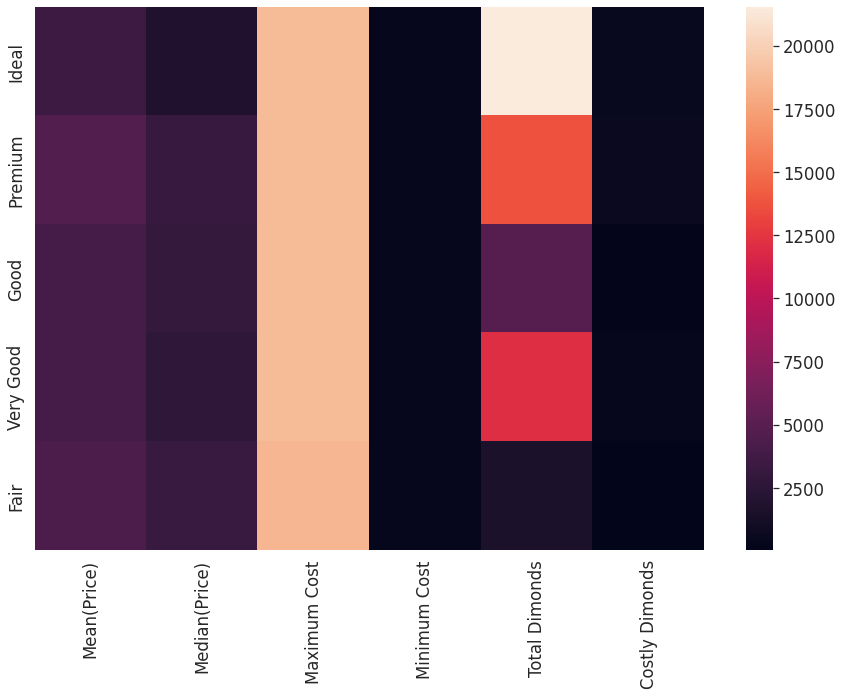

In [ ]:
sns.heatmap(cut_summary);

In [ ]:
#cut_summary['Percetage'] = (cut_summary['Total Dimonds'] / cut_summary['Costly Dimonds'].sum()) * 100
cut_summary['Percetage'] = cut_summary['Costly Dimonds'] * 100/ cut_summary['Total Dimonds'] 

In [ ]:
#pip install dataframe_image

In [ ]:
#import dataframe_image as dfi

In [ ]:
cut_summary

Mean(Price)  Median(Price)  Maximum Cost  Minimum Cost  \
Ideal      3457.541970         1810.0         18806           326   
Premium    4584.257704         3185.0         18823           326   
Good       3928.864452         3050.5         18788           327   
Very Good  3981.759891         2648.0         18818           336   
Fair       4358.757764         3282.0         18574           337   

           Total Dimonds  Costly Dimonds  Percetage  
Ideal              21551             531   2.463923  
Premium            13791             587   4.256399  
Good                4906             129   2.629433  
Very Good          12082             367   3.037577  
Fair                1610              41   2.546584

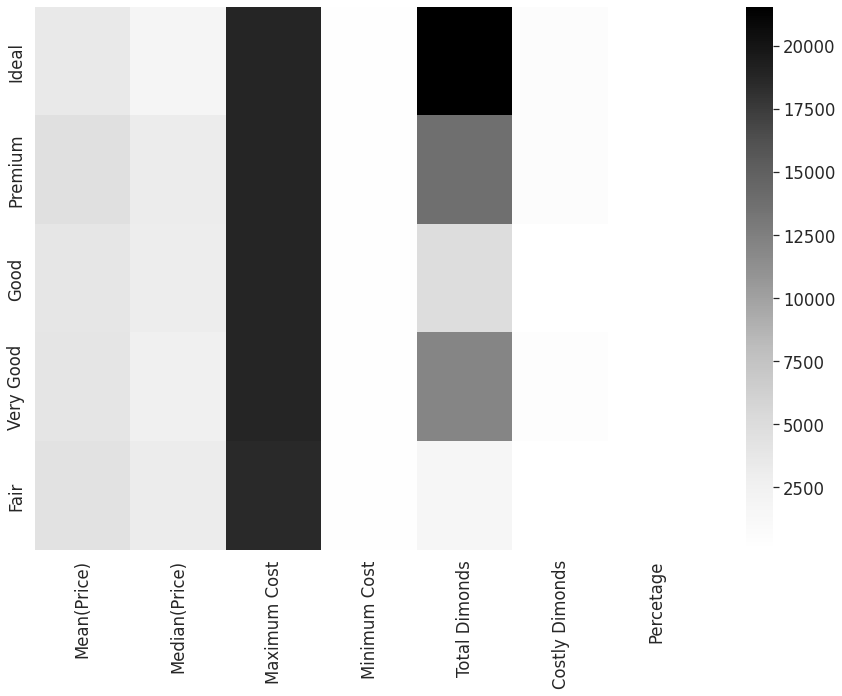

In [ ]:
sns.heatmap(cut_summary, cmap="Greys");

## Relation between "Color" and "Price"

In [ ]:
d.color.unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

### Color - 'E'

In [ ]:
df11= d.copy()
df11 = df11[(df11['color'] == 'E')]

In [ ]:
df11.head()

carat      cut color clarity  depth  table  price     x     y     z
0    0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1    0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2    0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
8    0.22     Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
14   0.20  Premium     E     SI2   60.2   62.0    345  3.79  3.75  2.27

In [ ]:
df11.shape

(9797, 10)

In [ ]:
df11.drop('carat', axis=1, inplace=True)

In [ ]:
df11.drop(['cut', 'clarity', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df11.head()

color  price
0      E    326
1      E    326
2      E    327
8      E    337
14     E    345

In [ ]:
df11.shape

(9797, 2)

In [ ]:
mean_E=np.mean(df11['price'])
mean_E

3076.7524752475247

In [ ]:
median_E=np.median(df11['price'])
median_E

1739.0

In [ ]:
df11_ = df11.copy()
df11_ = df11_[(df11_['price'] > 1810.0)]

In [ ]:
df11_.head()

color  price
90     E   2757
91     E   2757
93     E   2759
95     E   2759
98     E   2760

In [ ]:
df11_.shape

(4721, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


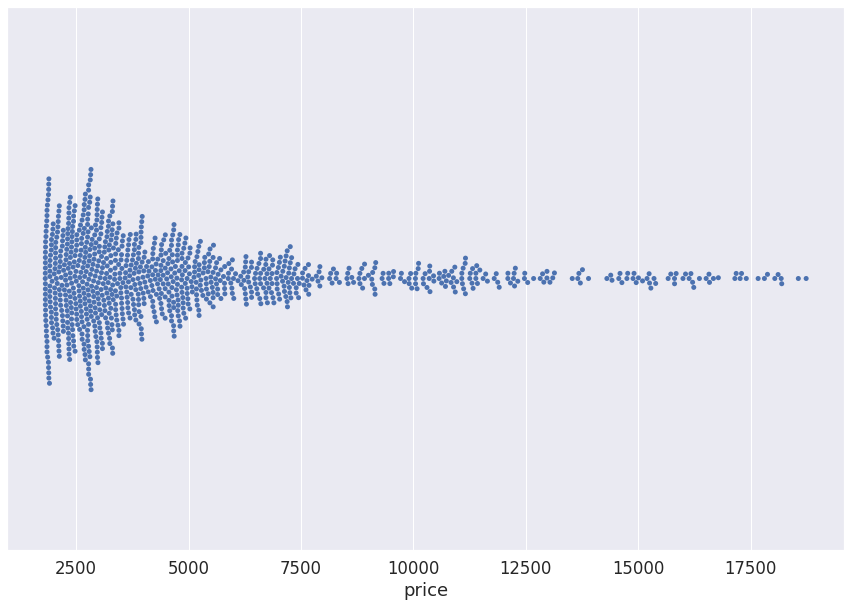

In [ ]:
sns.swarmplot(df11_.sample(1000).price);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


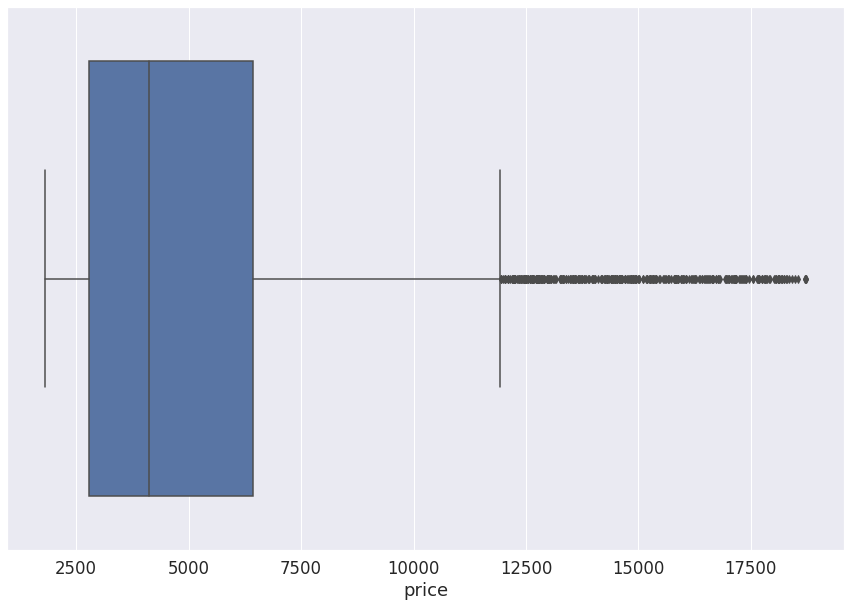

In [ ]:
sns.boxplot(df11_.price)

In [ ]:
max_E=np.max(df11['price'])
max_E

18731

In [ ]:
min_E=np.min(df11['price'])
min_E

326

In [ ]:
df11__ = df11.copy()
df11__ = df11__[(df11__['price'] > 15000.0)]

In [ ]:
df11__.shape

(161, 2)

### Color - I

In [ ]:
df12= d.copy()
df12 = df12[(df12['color'] == 'I')]

In [ ]:

df12.head()

carat        cut color clarity  depth  table  price     x     y     z
3    0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
6    0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
16   0.30      Ideal     I     SI2   62.0   54.0    348  4.31  4.34  2.68
20   0.30       Good     I     SI2   63.3   56.0    351  4.26  4.30  2.71
26   0.24    Premium     I     VS1   62.5   57.0    355  3.97  3.94  2.47

In [ ]:
df12.shape

(5422, 10)

In [ ]:
df12.drop(['cut', 'clarity', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df12.drop('carat', axis=1, inplace=True)

In [ ]:
df12.head()

color  price
3      I    334
6      I    336
16     I    348
20     I    351
26     I    355

In [ ]:
df12.shape

(5422, 2)

In [ ]:
mean_I=np.mean(df12['price'])
mean_I

5091.874953891553

In [ ]:
median_I=np.median(df12['price'])
median_I

3730.0

In [ ]:
df12_ = df12.copy()
df12_ = df12_[(df12_['price'] > 3185.0)]

In [ ]:
df12_.head()

color  price
2459     I   3190
2492     I   3196
2518     I   3201
2556     I   3209
2568     I   3211

In [ ]:
df12_.shape

(2941, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


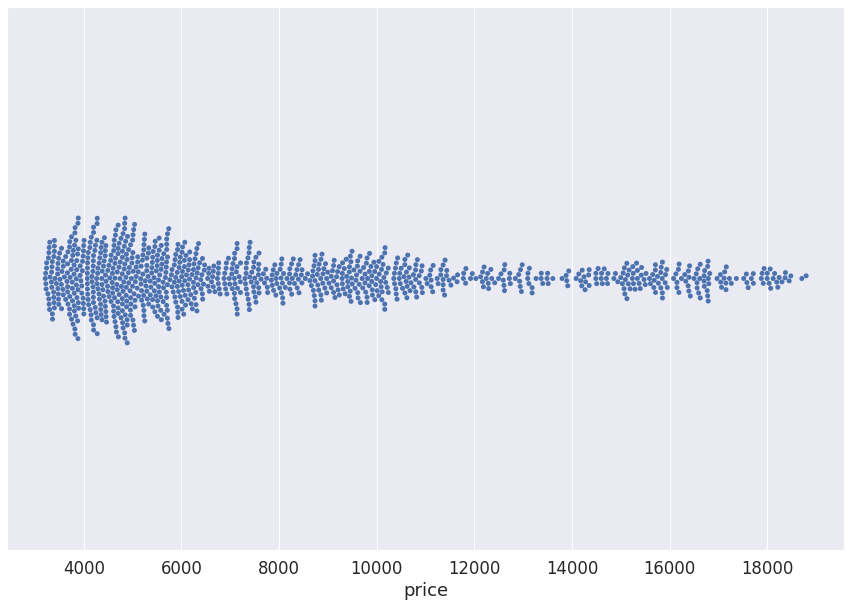

In [ ]:
sns.swarmplot(df12_.sample(1000).price);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


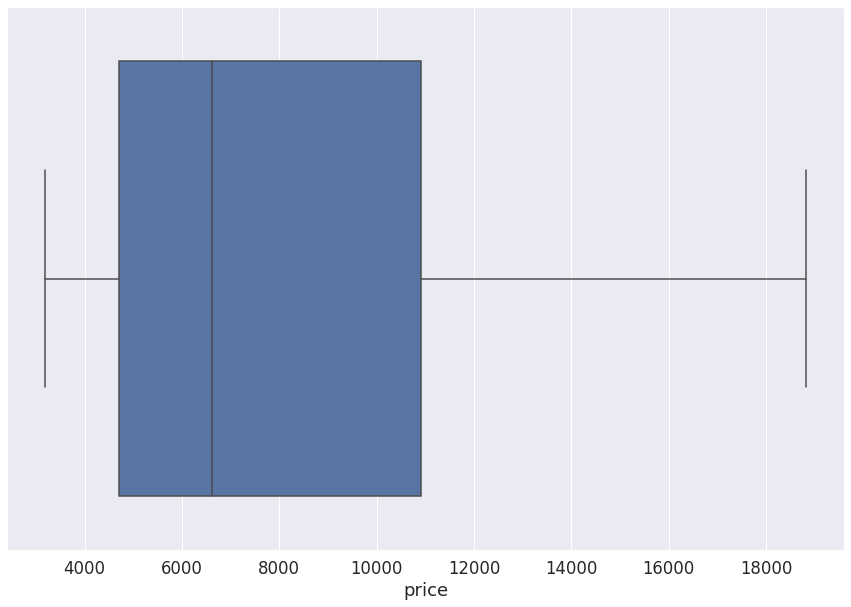

In [ ]:
sns.boxplot(df12_.price)

In [ ]:
max_I=np.max(df12['price'])
max_I

18823

In [ ]:
min_I=np.min(df12['price'])
min_I

334

In [ ]:
df12__ = df12.copy()
df12__ = df12__[(df12__['price'] > 15000.0)]

In [ ]:
df12__.shape

(369, 2)

### Color - J

In [ ]:
df13= d.copy()
df13 = df13[(df13['color'] == 'J')]

In [ ]:
df13.head()

carat        cut color clarity  depth  table  price     x     y     z
4    0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5    0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
10   0.30       Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73
11   0.23      Ideal     J     VS1   62.8   56.0    340  3.93  3.90  2.46
13   0.31      Ideal     J     SI2   62.2   54.0    344  4.35  4.37  2.71

In [ ]:
df13.shape

(2808, 10)

In [ ]:
df13.drop(['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df13.head()

color  price
4      J    335
5      J    336
10     J    339
11     J    340
13     J    344

In [ ]:
mean_J=np.mean(df13['price'])
mean_J

5323.81801994302

In [ ]:
median_J=np.median(df13['price'])
median_J

4234.0

In [ ]:
df13_ = df13.copy()
df13_ = df13_[(df13_['price'] > 3050.5)]

In [ ]:
df13_.head()

color  price
1825     J   3058
1834     J   3061
1843     J   3062
1869     J   3070
1906     J   3080

In [ ]:
df13_.shape

(1761, 2)

In [ ]:
max_J=np.max(df13['price'])
max_J

18710

In [ ]:
min_J=np.min(df13['price'])
min_J

335

In [ ]:
df13__ = df13.copy()
df13__ = df13__[(df13__['price'] > 15000.0)]

In [ ]:
df13__.shape

(121, 2)

### Color - H

In [ ]:
df14= d.copy()
df14 = df14[(df14['color'] == 'H')]

In [ ]:
df14.head()

carat        cut color clarity  depth  table  price     x     y     z
7    0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
9    0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39
22   0.23  Very Good     H     VS1   61.0   57.0    353  3.94  3.96  2.41
37   0.31       Good     H     SI1   64.0   54.0    402  4.29  4.31  2.75
44   0.32       Good     H     SI2   63.1   56.0    403  4.34  4.37  2.75

In [ ]:
df14.shape

(8304, 10)

In [ ]:
df14.drop(['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df14.head()

color  price
7      H    337
9      H    338
22     H    353
37     H    402
44     H    403

In [ ]:
mean_H=np.mean(df14['price'])
mean_H

4486.669195568401

In [ ]:
median_H=np.median(df14['price'])
median_H

3460.0

In [ ]:
df14_ = df14.copy()
df14_ = df14_[(df14_['price'] > 2648)]

In [ ]:
df14_.head()

color  price
99      H   2760
126     H   2763
128     H   2763
129     H   2763
130     H   2763

In [ ]:
df14_.shape

(4638, 2)

In [ ]:
max_H=np.max(df14['price'])
max_H

18803

In [ ]:
min_H=np.min(df14['price'])
min_H

337

In [ ]:
df14__ = df14.copy()
df14__ = df14__[(df14__['price'] > 15000)]

In [ ]:
df14__.shape

(319, 2)

### Color - F

In [ ]:
df15= d.copy()
df15 = df15[(df15['color'] == 'F')]

In [ ]:
df15.head()

carat        cut color clarity  depth  table  price     x     y     z
12   0.22    Premium     F     SI1   60.4   61.0    342  3.88  3.84  2.33
29   0.23  Very Good     F     VS1   60.9   57.0    357  3.96  3.99  2.42
30   0.23  Very Good     F     VS1   60.0   57.0    402  4.00  4.03  2.41
31   0.23  Very Good     F     VS1   59.8   57.0    402  4.04  4.06  2.42
35   0.23       Good     F     VS1   58.2   59.0    402  4.06  4.08  2.37

In [ ]:
df15.shape

(9542, 10)

In [ ]:
df15.drop(['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df15.head()

color  price
12     F    342
29     F    357
30     F    402
31     F    402
35     F    402

In [ ]:
mean_F=np.mean(df15['price'])
mean_F

3724.886396981765

In [ ]:
median_F=np.median(df15['price'])
median_F

2343.5

In [ ]:
df15_ = df15.copy()
df15_ = df15_[(df15_['price'] > 3282)]

In [ ]:
df15_.head()

color  price
2900     F   3283
2905     F   3283
2908     F   3284
2912     F   3285
2914     F   3285

In [ ]:
df15_.shape

(3690, 2)

In [ ]:
df15__ = df15.copy()
df15__ = df15__[(df15__['price'] > 15000)]

In [ ]:
df15__.head()

color  price
25886     F  15005
25892     F  15017
25893     F  15022
25898     F  15026
25901     F  15031

In [ ]:
df15__.shape

(232, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


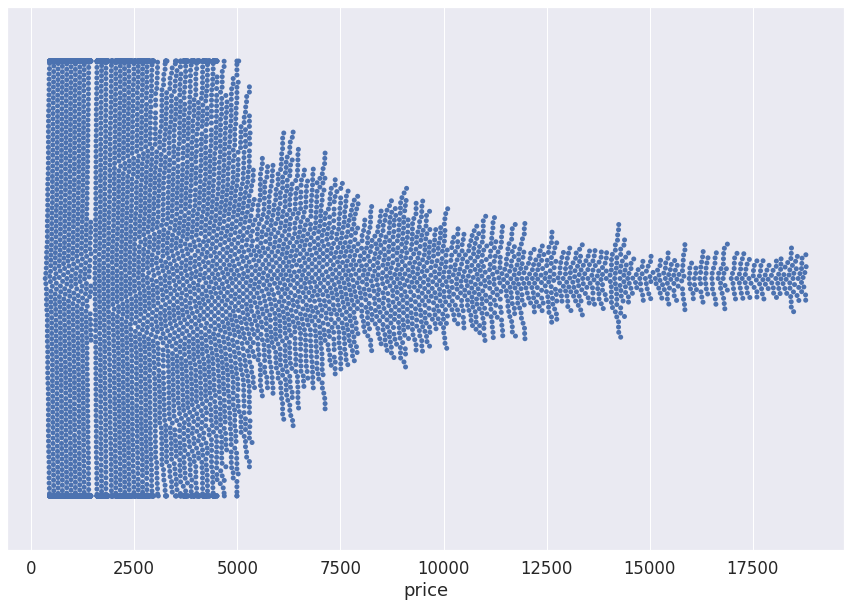

In [ ]:
sns.swarmplot(df15.price);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


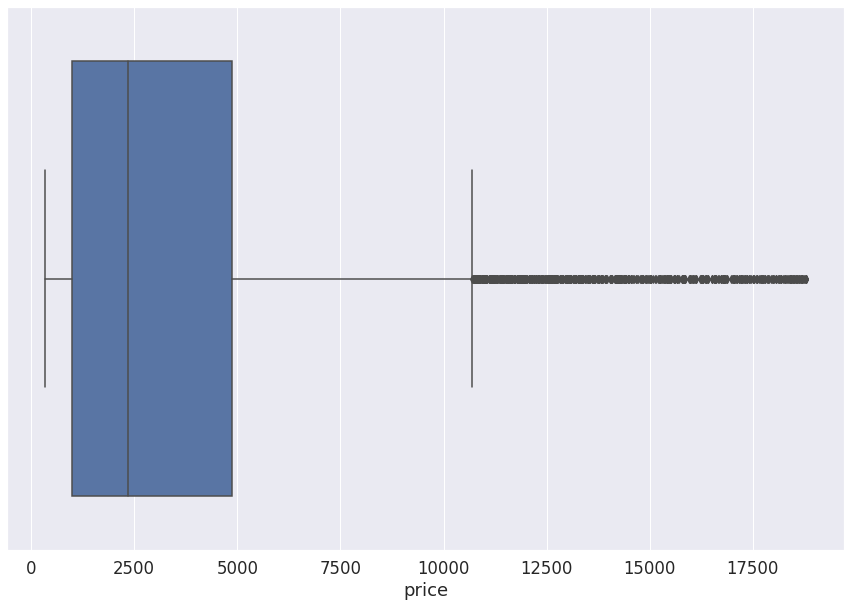

In [ ]:
sns.boxplot(df15.price)

In [ ]:
max_F=np.max(df15['price'])
max_F

18791

In [ ]:
min_F=np.min(df15['price'])
min_F

342

### Color - G

In [ ]:
df16= d.copy()
df16 = df16[(df16['color'] == 'G')]

In [ ]:
df16.head()

carat        cut color clarity  depth  table  price     x     y     z
25   0.23  Very Good     G    VVS2   60.4   58.0    354  3.97  4.01  2.41
51   0.23      Ideal     G     VS1   61.9   54.0    404  3.93  3.95  2.44
65   0.28      Ideal     G    VVS2   61.4   56.0    553  4.19  4.22  2.58
67   0.31  Very Good     G     SI1   63.3   57.0    553  4.33  4.30  2.73
68   0.31    Premium     G     SI1   61.8   58.0    553  4.35  4.32  2.68

In [ ]:
df16.shape

(11292, 10)

In [ ]:
df16.drop(['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df16.head()

color  price
25     G    354
51     G    404
65     G    553
67     G    553
68     G    553

In [ ]:
mean_G=np.mean(df16['price'])
mean_G

3999.135671271697

In [ ]:
median_G=np.median(df16['price'])
median_G

2242.0

In [ ]:
df16__ = df16.copy()
df16__ = df16__[(df16__['price'] > 15000)]

In [ ]:
df16__.head()

color  price
25889     G  15013
25890     G  15014
25891     G  15014
25894     G  15025
25907     G  15038

In [ ]:
df16__.shape

(333, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


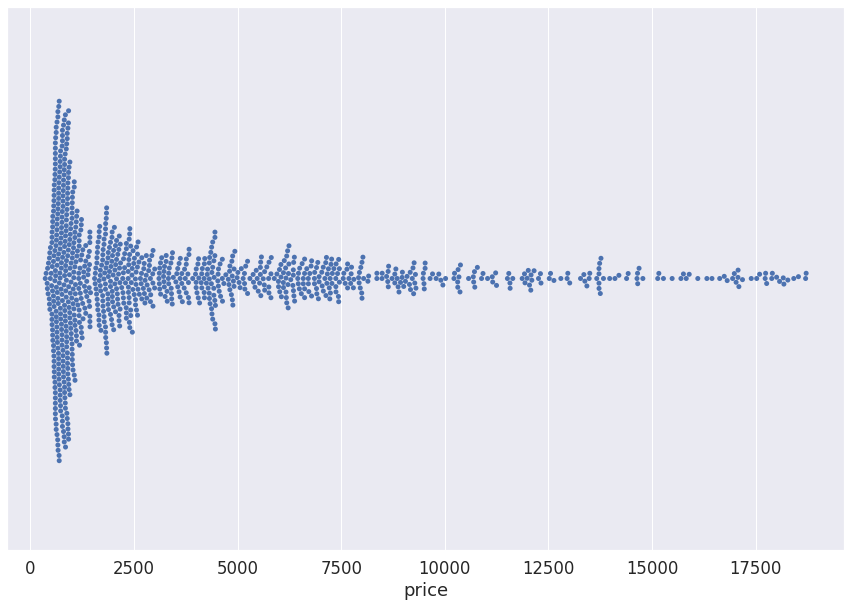

In [ ]:
sns.swarmplot(df16.sample(1000).price);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


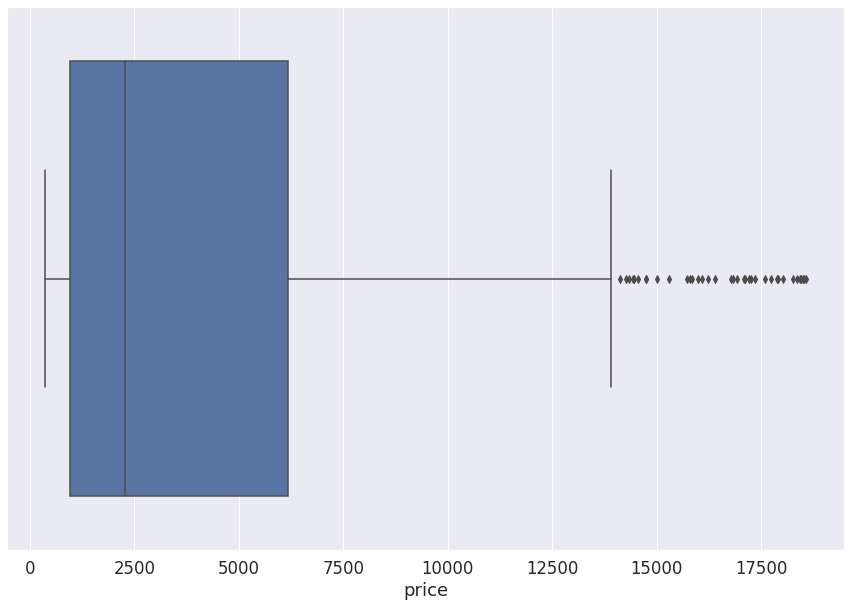

In [ ]:
sns.boxplot(df16.sample(1000).price)

In [ ]:
max_G=np.max(df16['price'])
max_G

18818

In [ ]:
min_G=np.min(df16['price'])
min_G

354

### Color - D

In [ ]:
df17= d.copy()
df17 = df17[(df17['color'] == 'D')]

In [ ]:
df17.head()

carat        cut color clarity  depth  table  price     x     y     z
28   0.23  Very Good     D     VS2   60.5   61.0    357  3.96  3.97  2.40
34   0.23  Very Good     D     VS1   61.9   58.0    402  3.92  3.96  2.44
38   0.26  Very Good     D     VS2   60.8   59.0    403  4.13  4.16  2.52
42   0.26       Good     D     VS2   65.2   56.0    403  3.99  4.02  2.61
43   0.26       Good     D     VS1   58.4   63.0    403  4.19  4.24  2.46

In [ ]:
df17.shape

(6775, 10)

In [ ]:
df17.drop(['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df17.head()

color  price
28     D    357
34     D    402
38     D    403
42     D    403
43     D    403

In [ ]:
mean_D=np.mean(df17['price'])
mean_D

3169.9540959409596

In [ ]:
median_D=np.median(df17['price'])
median_D

1838.0

In [ ]:
df17__ = df17.copy()
df17__ = df17__[(df17__['price'] > 15000)]

In [ ]:
df17__.head()

color  price
25888     D  15011
25911     D  15052
25924     D  15081
25925     D  15081
25937     D  15100

In [ ]:
df17__.shape

(120, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


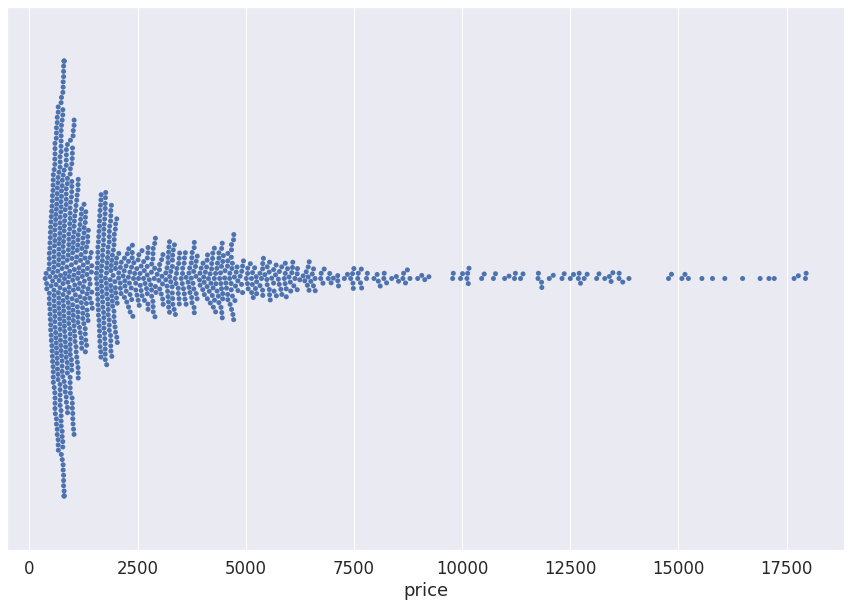

In [ ]:
sns.swarmplot(df17.sample(1000).price);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


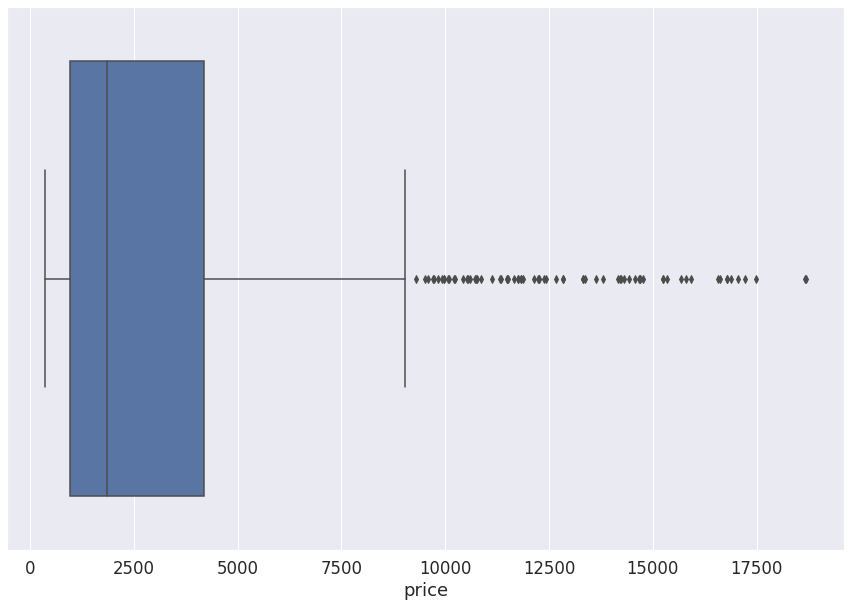

In [ ]:
sns.boxplot(df17.sample(1000).price)

In [ ]:
max_D=np.max(df17['price'])
max_D

18693

In [ ]:
min_D=np.min(df17['price'])
min_D

357

### Summary of relation between "Color" and "Price"

In [ ]:
color_mean = pd.Series([mean_E, mean_I, mean_J, mean_H, mean_F, mean_G, mean_D], 
                 index=['E', 'I', 'J', 'H', 'F', 'G', 'D'])
color_median = pd.Series([median_E, median_I, median_J, median_H, median_F, median_G, median_D], 
                     index=['E', 'I', 'J', 'H', 'F', 'G', 'D'])
color_max = pd.Series([max_E, max_I, max_J, max_H, max_F, max_G, max_D], 
                     index=['E', 'I', 'J', 'H', 'F', 'G', 'D'])
color_min = pd.Series([min_E, min_I, min_J, min_H, min_F, min_G, min_D], 
                     index=['E', 'I', 'J', 'H', 'F', 'G', 'D'])
color_total_dimonds = pd.Series([4721,5422, 2808, 8304, 9542, 11292, 6775], 
                     index=['E', 'I', 'J', 'H', 'F', 'G', 'D'])
# Dimonds worth of cost of 15000 USD or more
color_costly_dimonds = pd.Series([161, 369, 121, 319, 232, 333, 120], 
                     index=['E', 'I', 'J', 'H', 'F', 'G', 'D'])

In [ ]:
color_summary = pd.DataFrame({'Mean(Price)': color_mean, 'Median(Price)': color_median, 'Maximum Cost': color_max, 'Minimum Cost': color_min, 'Total Dimonds': color_total_dimonds, 'Costly Dimonds': color_costly_dimonds})

In [ ]:
color_summary

Mean(Price)  Median(Price)  Maximum Cost  Minimum Cost  Total Dimonds  \
E  3076.752475         1739.0         18731           326           4721   
I  5091.874954         3730.0         18823           334           5422   
J  5323.818020         4234.0         18710           335           2808   
H  4486.669196         3460.0         18803           337           8304   
F  3724.886397         2343.5         18791           342           9542   
G  3999.135671         2242.0         18818           354          11292   
D  3169.954096         1838.0         18693           357           6775   

   Costly Dimonds  
E             161  
I             369  
J             121  
H             319  
F             232  
G             333  
D             120

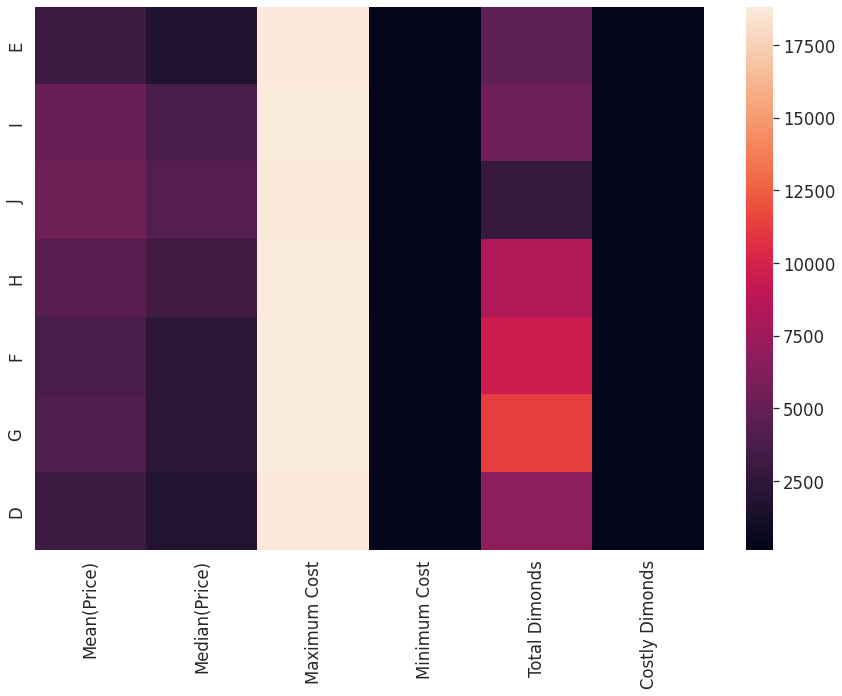

In [ ]:
sns.heatmap(color_summary);

In [ ]:
#cut_summary['Percetage'] = (cut_summary['Total Dimonds'] / cut_summary['Costly Dimonds'].sum()) * 100
color_summary['Percetage'] = color_summary['Costly Dimonds'] * 100/ color_summary['Total Dimonds'] 

In [ ]:
color_summary

Mean(Price)  Median(Price)  Maximum Cost  Minimum Cost  Total Dimonds  \
E  3076.752475         1739.0         18731           326           4721   
I  5091.874954         3730.0         18823           334           5422   
J  5323.818020         4234.0         18710           335           2808   
H  4486.669196         3460.0         18803           337           8304   
F  3724.886397         2343.5         18791           342           9542   
G  3999.135671         2242.0         18818           354          11292   
D  3169.954096         1838.0         18693           357           6775   

   Costly Dimonds  Percetage  
E             161   3.410294  
I             369   6.805607  
J             121   4.309117  
H             319   3.841522  
F             232   2.431356  
G             333   2.948990  
D             120   1.771218

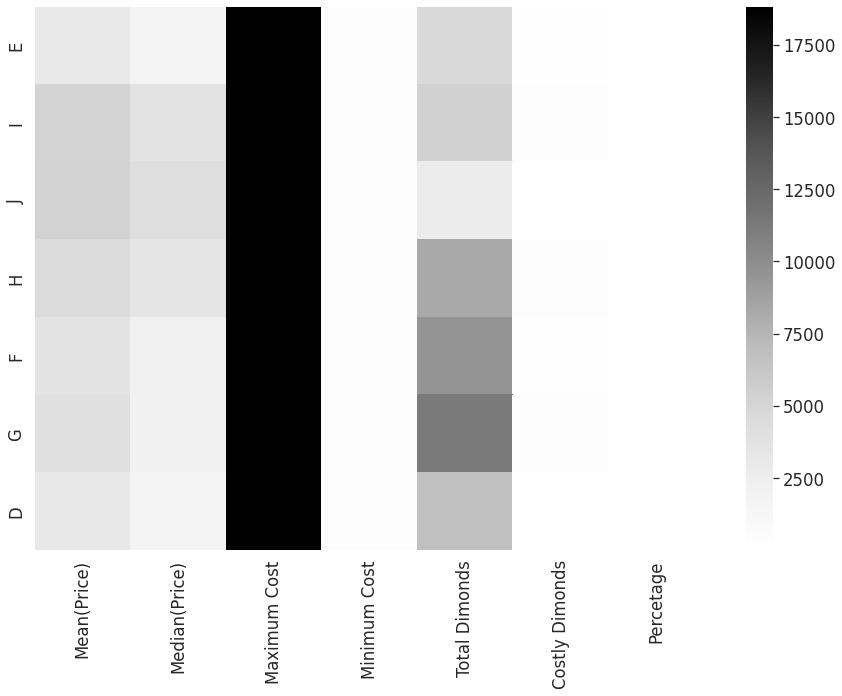

In [ ]:
sns.heatmap(color_summary, cmap="Greys");

## Relation between "Clarity" and "Price"

In [ ]:
d.clarity.unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

### Clarity - 'SI2'

In [ ]:
df21= d.copy()
df21 = df21[(df21['clarity'] == 'SI2')]

In [ ]:
df21.head()

carat      cut color clarity  depth  table  price     x     y     z
0    0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
4    0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
13   0.31    Ideal     J     SI2   62.2   54.0    344  4.35  4.37  2.71
14   0.20  Premium     E     SI2   60.2   62.0    345  3.79  3.75  2.27
16   0.30    Ideal     I     SI2   62.0   54.0    348  4.31  4.34  2.68

In [ ]:
df21.shape

(9194, 10)

In [ ]:
df21.drop('carat', axis=1, inplace=True)

In [ ]:
df21.drop(['cut', 'color', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df21.head()

clarity  price
0      SI2    326
4      SI2    335
13     SI2    344
14     SI2    345
16     SI2    348

In [ ]:
df21.shape

(9194, 2)

In [ ]:
mean_SI2=np.mean(df21['price'])
mean_SI2

5063.028605612356

In [ ]:
median_SI2=np.median(df21['price'])
median_SI2

4072.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


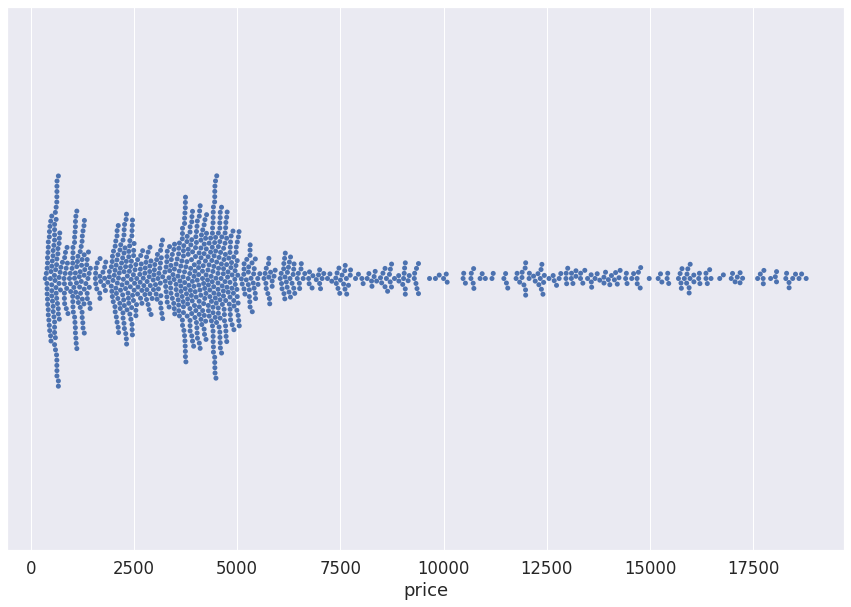

In [ ]:
sns.swarmplot(df21.sample(1000).price);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


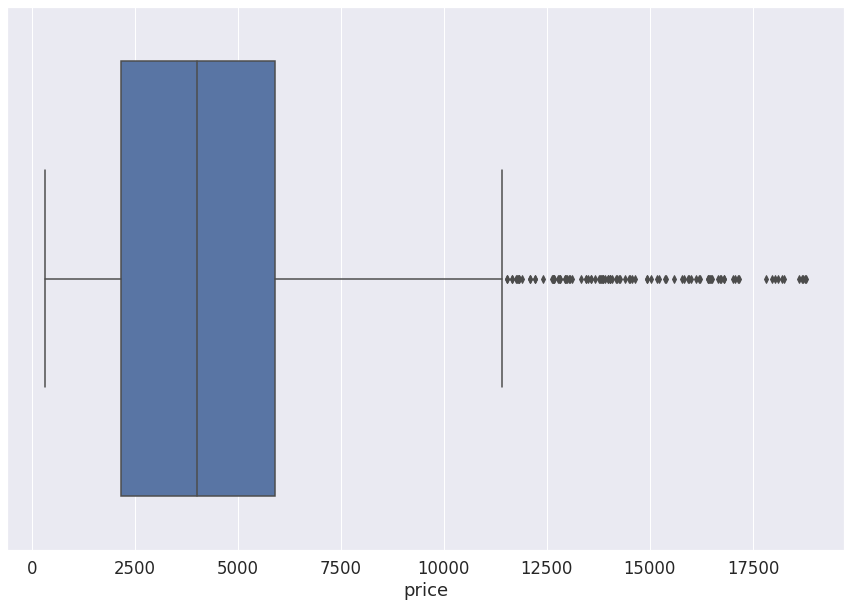

In [ ]:
sns.boxplot(df21.sample(1000).price)

In [ ]:
max_SI2=np.max(df21['price'])
max_SI2

18804

In [ ]:
min_SI2=np.min(df21['price'])
min_SI2

326

In [ ]:
df21__ = df21.copy()
df21__ = df21__[(df21__['price'] > 15000.0)]

In [ ]:
df21__.shape

(518, 2)

### Clarity - SI1

In [ ]:
df22= d.copy()
df22 = df22[(df22['clarity'] == 'SI1')]

In [ ]:
df22.head()

carat        cut color clarity  depth  table  price     x     y     z
1    0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
7    0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
10   0.30       Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73
12   0.22    Premium     F     SI1   60.4   61.0    342  3.88  3.84  2.33
17   0.30       Good     J     SI1   63.4   54.0    351  4.23  4.29  2.70

In [ ]:
df22.shape

(13065, 10)

In [ ]:
df22.drop(['cut', 'color', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df22.drop('carat', axis=1, inplace=True)

In [ ]:
df22.head()

clarity  price
1      SI1    326
7      SI1    337
10     SI1    339
12     SI1    342
17     SI1    351

In [ ]:
df22.shape

(13065, 2)

In [ ]:
mean_SI1=np.mean(df22['price'])
mean_SI1

3996.001148105626

In [ ]:
median_SI1=np.median(df22['price'])
median_SI1

2822.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


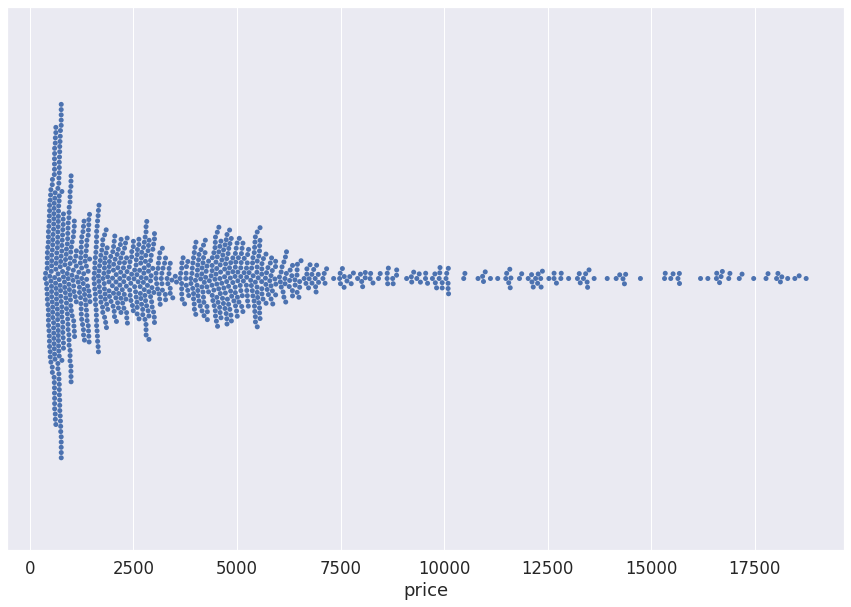

In [ ]:
sns.swarmplot(df22.sample(1000).price);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


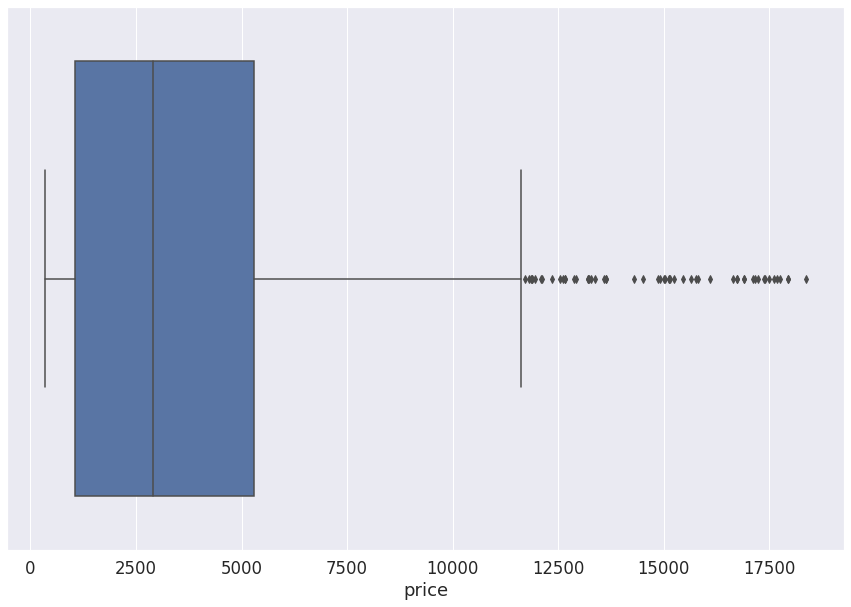

In [ ]:
sns.boxplot(df22.sample(1000).price)

In [ ]:
max_SI1=np.max(df22['price'])
max_SI1

18818

In [ ]:
min_SI1=np.min(df22['price'])
min_SI1

326

In [ ]:
df22__ = df22.copy()
df22__ = df22__[(df22__['price'] > 15000.0)]

In [ ]:
df22__.shape

(364, 2)

### Clarity - VS1

In [ ]:
df23= d.copy()
df23 = df23[(df23['clarity'] == 'VS1')]

In [ ]:
df23.head()

carat        cut color clarity  depth  table  price     x     y     z
2    0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
9    0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39
11   0.23      Ideal     J     VS1   62.8   56.0    340  3.93  3.90  2.46
22   0.23  Very Good     H     VS1   61.0   57.0    353  3.94  3.96  2.41
26   0.24    Premium     I     VS1   62.5   57.0    355  3.97  3.94  2.47

In [ ]:
df23.shape

(8171, 10)

In [ ]:
df23.drop(['carat', 'cut', 'color', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df23.head()

clarity  price
2      VS1    327
9      VS1    338
11     VS1    340
22     VS1    353
26     VS1    355

In [ ]:
mean_VS1=np.mean(df23['price'])
mean_VS1

3839.4553910170116

In [ ]:
median_VS1=np.median(df23['price'])
median_VS1

2005.0

In [ ]:
max_VS1=np.max(df23['price'])
max_VS1

18795

In [ ]:
min_VS1=np.min(df23['price'])
min_VS1

327

In [ ]:
df23__ = df23.copy()
df23__ = df23__[(df23__['price'] > 15000.0)]

In [ ]:
df23__.shape

(227, 2)

### Clarity - VS2

In [ ]:
df24= d.copy()
df24 = df24[(df24['clarity'] == 'VS2')]

In [ ]:
df24.head()

carat        cut color clarity  depth  table  price     x     y     z
3    0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
8    0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
21   0.23  Very Good     E     VS2   63.8   55.0    352  3.85  3.92  2.48
27   0.30  Very Good     J     VS2   62.2   57.0    357  4.28  4.30  2.67
28   0.23  Very Good     D     VS2   60.5   61.0    357  3.96  3.97  2.40

In [ ]:
df24.shape

(12258, 10)

In [ ]:
df24.drop(['carat', 'cut', 'color', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df24.head()

clarity  price
3      VS2    334
8      VS2    337
21     VS2    352
27     VS2    357
28     VS2    357

In [ ]:
mean_VS2=np.mean(df24['price'])
mean_VS2

3924.989394681025

In [ ]:
median_VS2=np.median(df24['price'])
median_VS2

2054.0

In [ ]:
max_VS2=np.max(df24['price'])
max_VS2

18823

In [ ]:
min_VS2=np.min(df24['price'])
min_VS2

334

In [ ]:
df24__ = df24.copy()
df24__ = df24__[(df24__['price'] > 15000)]

In [ ]:
df24__.shape

(358, 2)

### Clarity - VVS2

In [ ]:
df25= d.copy()
df25 = df25[(df25['clarity'] == 'VVS2')]

In [ ]:
df25.head()

carat        cut color clarity  depth  table  price     x     y     z
5    0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
25   0.23  Very Good     G    VVS2   60.4   58.0    354  3.97  4.01  2.41
65   0.28      Ideal     G    VVS2   61.4   56.0    553  4.19  4.22  2.58
75   0.26  Very Good     F    VVS2   59.2   60.0    554  4.19  4.22  2.49
76   0.26  Very Good     E    VVS2   59.9   58.0    554  4.15  4.23  2.51

In [ ]:
df25.shape

(5066, 10)

In [ ]:
df25.drop(['carat', 'cut', 'color', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df25.head()

clarity  price
5     VVS2    336
25    VVS2    354
65    VVS2    553
75    VVS2    554
76    VVS2    554

In [ ]:
mean_VVS2=np.mean(df25['price'])
mean_VVS2

3283.737070667193

In [ ]:
median_VVS2=np.median(df25['price'])
median_VVS2

1311.0

In [ ]:
df25__ = df25.copy()
df25__ = df25__[(df25__['price'] > 15000)]

In [ ]:
df25__.head()

clarity  price
25889    VVS2  15013
25901    VVS2  15031
25914    VVS2  15059
25922    VVS2  15076
25944    VVS2  15110

In [ ]:
df25__.shape

(78, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


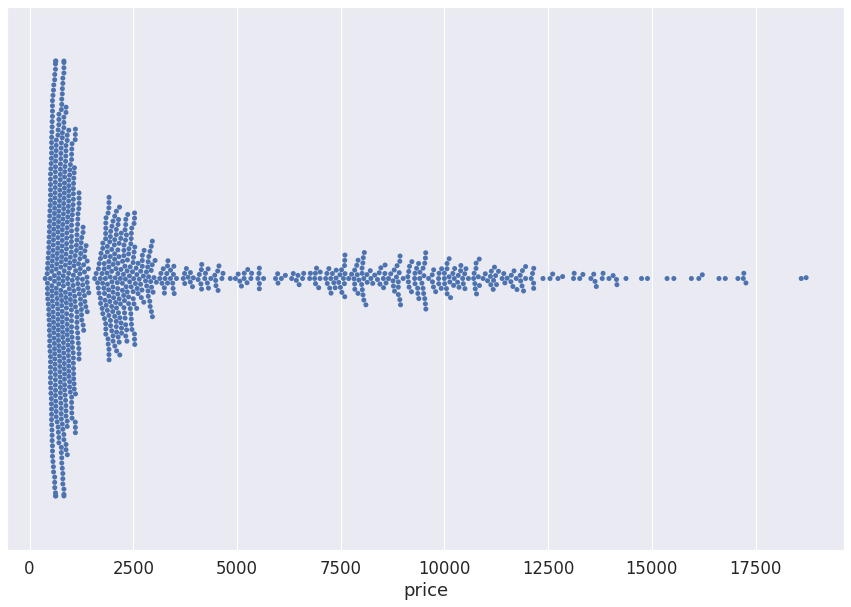

In [ ]:
sns.swarmplot(df25.sample(1000).price);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


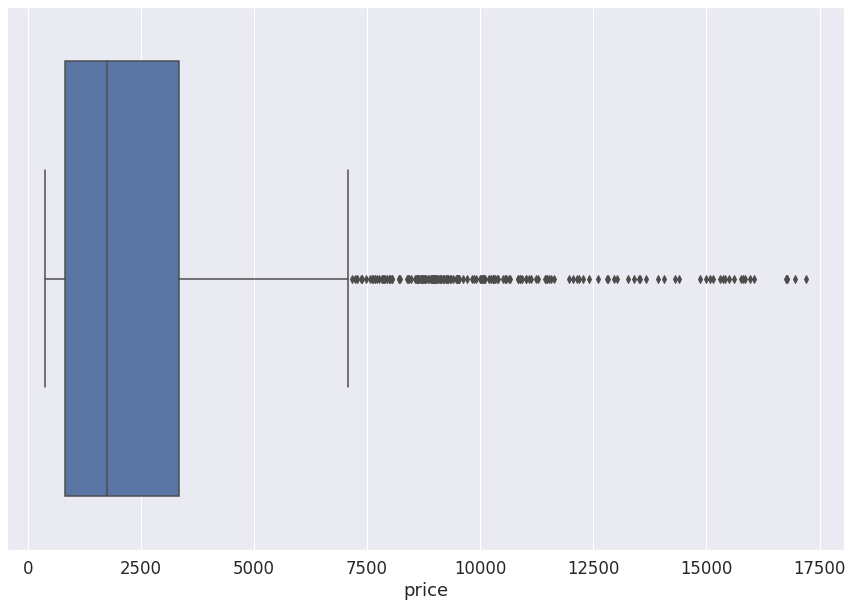

In [ ]:
sns.boxplot(df25.sample(1000).price)

In [ ]:
max_VVS2=np.max(df25['price'])
max_VVS2

18768

In [ ]:
min_VVS2=np.min(df25['price'])
min_VVS2

336

### Clarity - VVS1

In [ ]:
df26= d.copy()
df26 = df26[(df26['clarity'] == 'VVS1')]

In [ ]:
df26.head()

carat        cut color clarity  depth  table  price     x     y     z
6    0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
66   0.32      Ideal     I    VVS1   62.0   55.3    553  4.39  4.42  2.73
69   0.24    Premium     E    VVS1   60.7   58.0    553  4.01  4.03  2.44
70   0.24  Very Good     D    VVS1   61.5   60.0    553  3.97  4.00  2.45
79   0.26  Very Good     E    VVS1   62.6   59.0    554  4.06  4.09  2.55

In [ ]:
df26.shape

(3655, 10)

In [ ]:
df26.drop(['carat', 'cut', 'color', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df26.head()

clarity  price
6     VVS1    336
66    VVS1    553
69    VVS1    553
70    VVS1    553
79    VVS1    554

In [ ]:
mean_VVS1=np.mean(df26['price'])
mean_VVS2

3283.737070667193

In [ ]:
median_VVS1=np.median(df26['price'])
median_VVS1

1093.0

In [ ]:
df26__ = df26.copy()
df26__ = df26__[(df26__['price'] > 15000)]

In [ ]:
df26__.head()

clarity  price
25886    VVS1  15005
25898    VVS1  15026
25954    VVS1  15134
25982    VVS1  15185
26045    VVS1  15247

In [ ]:
df26__.shape

(50, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


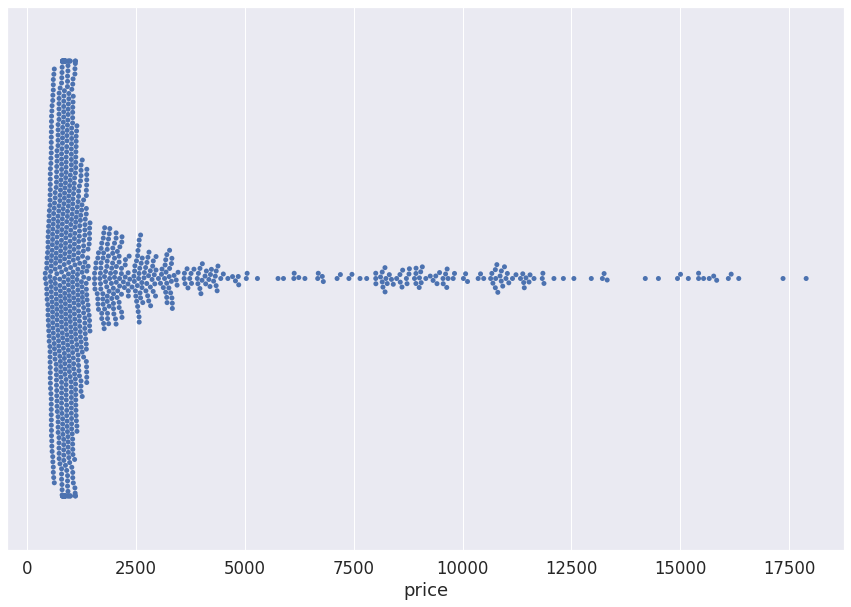

In [ ]:
sns.swarmplot(df26.sample(1000).price);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


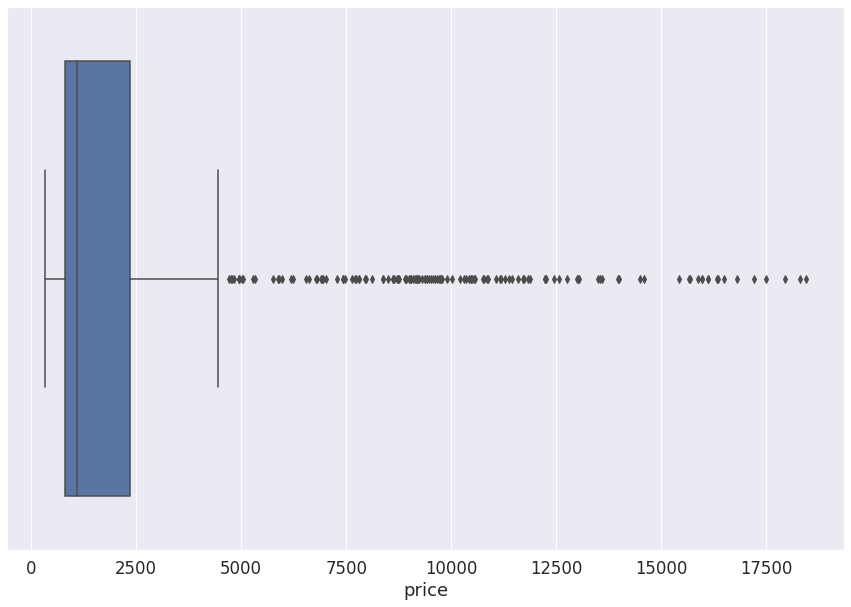

In [ ]:
sns.boxplot(df26.sample(1000).price)

In [ ]:
max_VVS1=np.max(df26['price'])
max_VVS1

18777

In [ ]:
min_VVS1=np.min(df26['price'])
min_VVS1

336

### Clarity - I1

In [ ]:
df27= d.copy()
df27 = df27[(df27['clarity'] == 'I1')]

In [ ]:
df27.head()

carat        cut color clarity  depth  table  price     x     y     z
15    0.32    Premium     E      I1   60.9   58.0    345  4.38  4.42  2.68
172   1.17  Very Good     J      I1   60.2   61.0   2774  6.83  6.90  4.13
215   1.01    Premium     F      I1   61.8   60.0   2781  6.39  6.36  3.94
241   1.01       Fair     E      I1   64.5   58.0   2788  6.29  6.21  4.03
315   0.96      Ideal     F      I1   60.7   55.0   2801  6.37  6.41  3.88

In [ ]:
df27.shape

(741, 10)

In [ ]:
df27.drop(['carat', 'cut', 'color', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df27.head()

clarity  price
15       I1    345
172      I1   2774
215      I1   2781
241      I1   2788
315      I1   2801

In [ ]:
mean_I1=np.mean(df27['price'])
mean_I1

3924.1686909581645

In [ ]:
median_I1=np.median(df27['price'])
median_I1

3344.0

In [ ]:
df27__ = df27.copy()
df27__ = df27__[(df27__['price'] > 15000)]

In [ ]:
df27__.head()

clarity  price
25998      I1  15223
25999      I1  15223
26431      I1  15964
26444      I1  15984
26534      I1  16193

In [ ]:
df27__.shape

(9, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


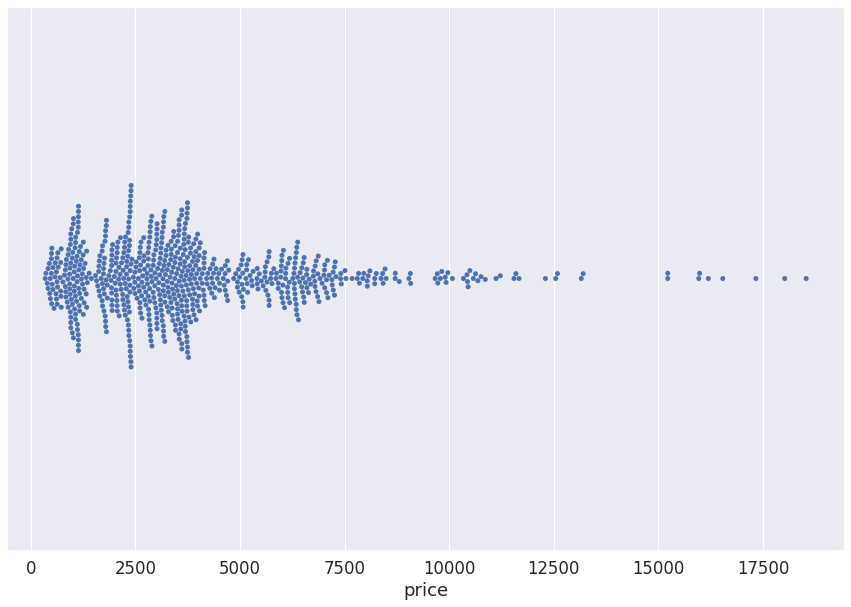

In [ ]:
sns.swarmplot(df27.price);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


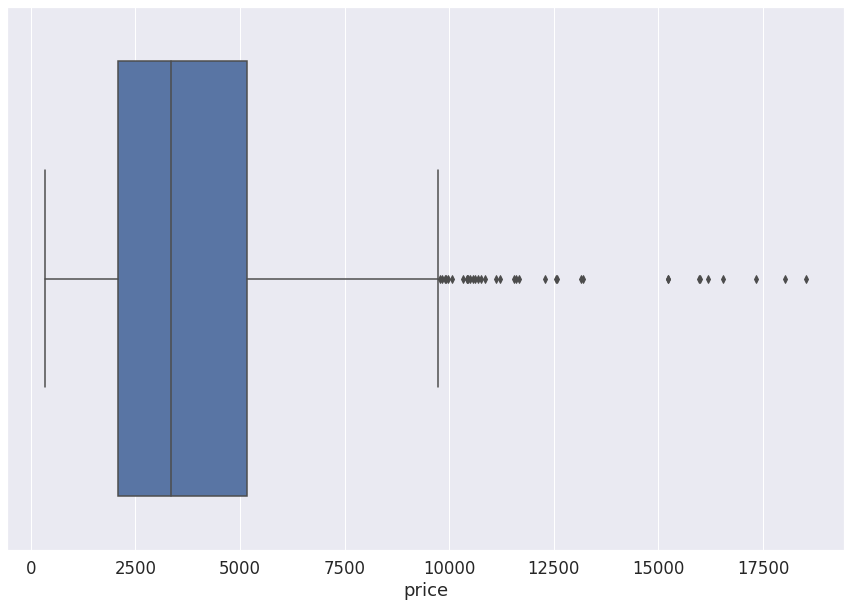

In [ ]:
sns.boxplot(df27.price)

In [ ]:
max_I1=np.max(df27['price'])
max_I1

18531

In [ ]:
min_I1=np.min(df27['price'])
min_I1

345

### Clarity - IF

In [ ]:
df28 = d.copy()
df28 = df28[(df28['clarity'] == 'IF')]

In [ ]:
df28.head()

carat        cut color clarity  depth  table  price     x     y     z
229   0.52      Ideal     F      IF   62.2   55.0   2783  5.14  5.18  3.21
250   0.55      Ideal     G      IF   60.9   57.0   2789  5.28  5.30  3.22
256   0.64      Ideal     G      IF   61.3   56.0   2790  5.54  5.58  3.41
281   0.72    Premium     I      IF   63.0   57.0   2795  5.72  5.70  3.60
304   0.60  Very Good     G      IF   61.6   56.0   2800  5.43  5.46  3.35

In [ ]:
df28.shape

(1790, 10)

In [ ]:
df28.drop(['carat', 'cut', 'color', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df28.head()

clarity  price
229      IF   2783
250      IF   2789
256      IF   2790
281      IF   2795
304      IF   2800

In [ ]:
mean_IF=np.mean(df28['price'])
mean_IF

2864.839106145251

In [ ]:
median_IF=np.median(df28['price'])
median_IF

1080.0

In [ ]:
df28__ = df28.copy()
df28__ = df28__[(df28__['price'] > 15000)]

In [ ]:
df28__.head()

clarity  price
25924      IF  15081
25925      IF  15081
25972      IF  15164
25986      IF  15193
25997      IF  15219

In [ ]:
df28__.shape

(51, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


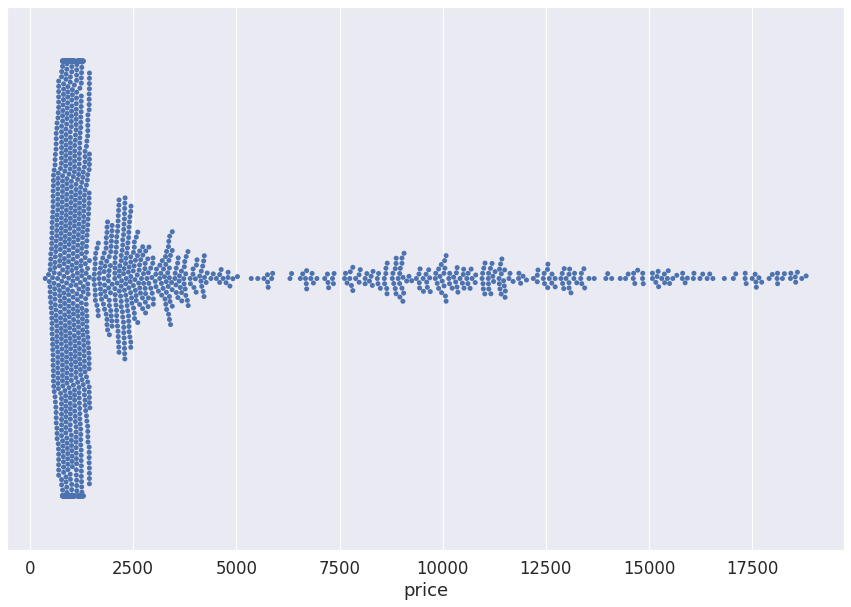

In [ ]:
sns.swarmplot(df28.price);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


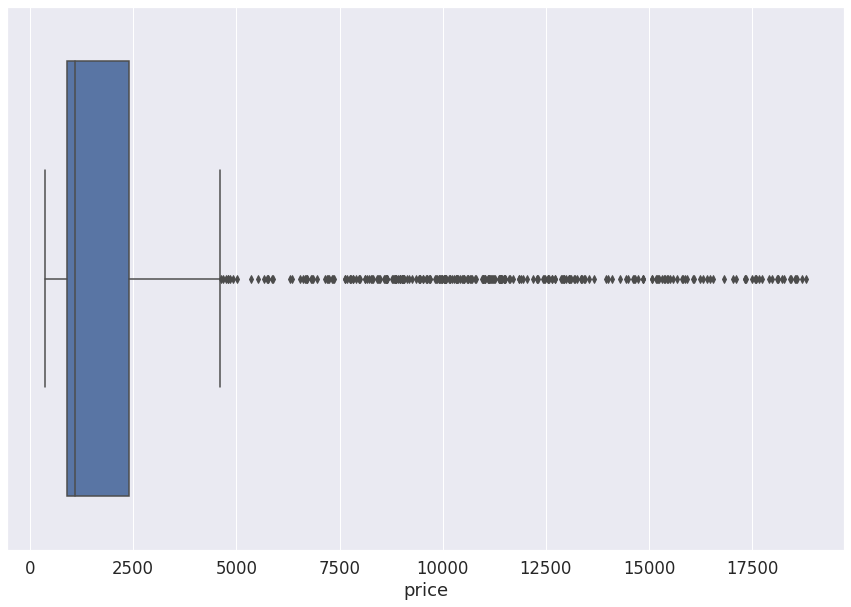

In [ ]:
sns.boxplot(df28.price)

In [ ]:
max_IF=np.max(df28['price'])
max_IF

18806

In [ ]:
min_IF=np.min(df28['price'])
min_IF

369

### Summary of relation between "Clarity" and "Price"

In [ ]:
clarity_mean = pd.Series([mean_SI2, mean_SI1, mean_VS1, mean_VS2, mean_VVS2, mean_VVS1, mean_I1, mean_IF], 
                 index=['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'])
clarity_median = pd.Series([median_SI2, median_SI1, median_VS1, median_VS2, median_VVS2, median_VVS1, median_I1, median_IF], 
                     index=['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'])
clarity_max = pd.Series([max_SI2, max_SI1, max_VS1, max_VS2, max_VVS2, max_VVS1, max_I1, max_IF], 
                     index=['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'])
clarity_min = pd.Series([min_SI2, min_SI1, min_VS1, min_VS2, min_VVS2, min_VVS1, min_I1, min_IF], 
                     index=['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'])
clarity_total_dimonds = pd.Series([9194, 13065, 8171, 12258, 5066, 3655, 741, 1790], 
                     index=['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'])
# Dimonds worth of cost of 15000 USD or more
clarity_costly_dimonds = pd.Series([518, 364, 227, 358, 78, 50, 9, 51], 
                     index=['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'])

In [ ]:
clarity_summary = pd.DataFrame({'Mean(Price)': clarity_mean, 'Median(Price)': clarity_median, 'Maximum Cost': clarity_max, 'Minimum Cost': clarity_min, 'Total Dimonds': clarity_total_dimonds, 'Costly Dimonds': clarity_costly_dimonds})

In [ ]:
clarity_summary

Mean(Price)  Median(Price)  Maximum Cost  Minimum Cost  Total Dimonds  \
SI2   5063.028606         4072.0         18804           326           9194   
SI1   3996.001148         2822.0         18818           326          13065   
VS1   3839.455391         2005.0         18795           327           8171   
VS2   3924.989395         2054.0         18823           334          12258   
VVS2  3283.737071         1311.0         18768           336           5066   
VVS1  2523.114637         1093.0         18777           336           3655   
I1    3924.168691         3344.0         18531           345            741   
IF    2864.839106         1080.0         18806           369           1790   

      Costly Dimonds  
SI2              518  
SI1              364  
VS1              227  
VS2              358  
VVS2              78  
VVS1              50  
I1                 9  
IF                51

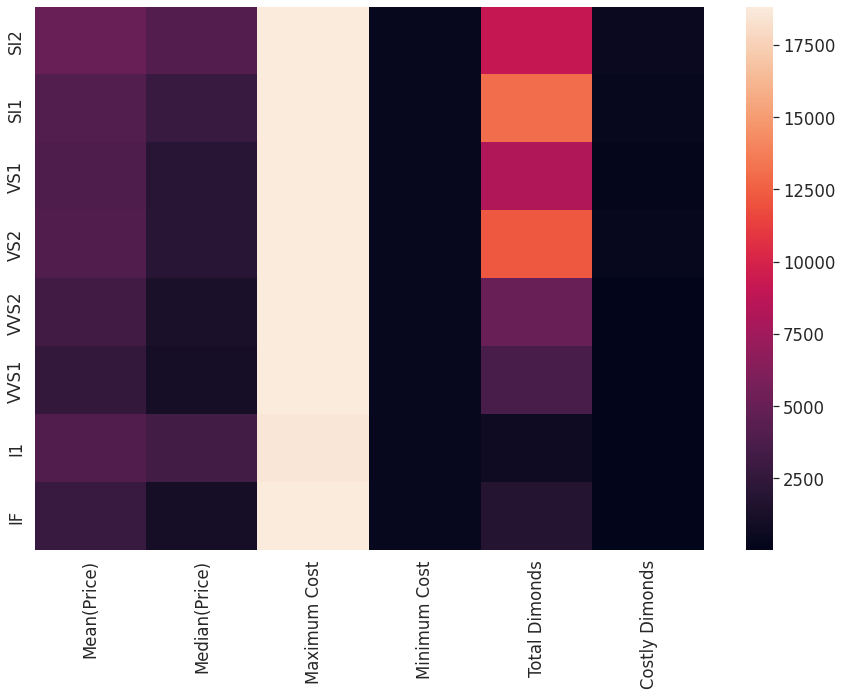

In [ ]:
sns.heatmap(clarity_summary);

In [ ]:
#cut_summary['Percetage'] = (cut_summary['Total Dimonds'] / cut_summary['Costly Dimonds'].sum()) * 100
clarity_summary['Percetage'] = clarity_summary['Costly Dimonds'] * 100/ clarity_summary['Total Dimonds'] 

In [ ]:
clarity_summary

Mean(Price)  Median(Price)  Maximum Cost  Minimum Cost  Total Dimonds  \
SI2   5063.028606         4072.0         18804           326           9194   
SI1   3996.001148         2822.0         18818           326          13065   
VS1   3839.455391         2005.0         18795           327           8171   
VS2   3924.989395         2054.0         18823           334          12258   
VVS2  3283.737071         1311.0         18768           336           5066   
VVS1  2523.114637         1093.0         18777           336           3655   
I1    3924.168691         3344.0         18531           345            741   
IF    2864.839106         1080.0         18806           369           1790   

      Costly Dimonds  Percetage  
SI2              518   5.634109  
SI1              364   2.786070  
VS1              227   2.778118  
VS2              358   2.920542  
VVS2              78   1.539676  
VVS1              50   1.367989  
I1                 9   1.214575  
IF                51   2.849162

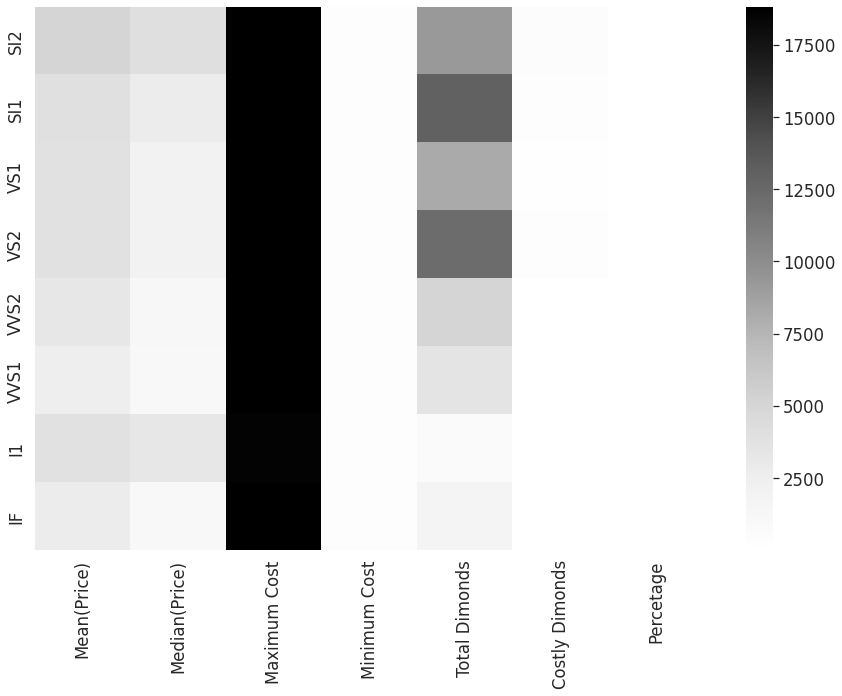

In [ ]:
sns.heatmap(clarity_summary, cmap="Greys");

## Hypothesis Testing

https://christopherduquet.com/diamond-pricing-guide/

**Null Hypothesis:** Dimond with higher Cost (12000-18000 USD) are made with 3.0 caret or moe.

Alternative Hypothesis: Dimond with higher Cost (12000-18000 USD) are not made with 3.0 caret or moe.


In [ ]:
df_ht = d.copy()
df_ht = df_ht[(df_ht['price'] > 12000)]
#& (df_ht['carat'] > 3.0)

In [ ]:
df_ht.head()

carat        cut color clarity  depth  table  price     x     y     z
23897   1.57      Ideal     H     VS2   61.8   55.0  12004  7.45  7.49  4.62
23898   1.50  Very Good     G     VS1   63.4   59.0  12005  7.25  7.19  4.58
23899   1.31      Ideal     G     VS1   61.6   57.0  12008  6.99  7.04  4.32
23900   1.50      Ideal     G     SI1   61.0   57.0  12009  7.38  7.41  4.51
23901   1.75  Very Good     D     SI2   60.7   57.0  12012  7.78  7.83  4.74

In [ ]:
sample = df_ht.sample(100)

In [ ]:
print(df_ht.shape)
print(sample.shape)

(3463, 10)
(100, 10)


In [ ]:
mean_ht=np.mean(sample['carat'])
mean_ht

1.8735

In [ ]:
median_ht=np.median(sample['carat'])
median_ht

2.01

In [ ]:
#Compute the number of sample
index=sample.index
n=len(index)
#print(index)
print(n)

100


In [ ]:
#Compute Standard Dviation - as we are unaware aboyt population variance 
stddev = np.std(sample['carat'], ddof=1)
#stddev1 = df_ht['carat'].std()
print(stddev)
#print(stddev1)

0.3854012077161808


In [ ]:
from math import sqrt
from scipy.stats import t

#Given
mu_0 = 3.0

#Compute test statistic
t_statistic = (mean_ht - mu_0)/(stddev/sqrt(n))

#Set alpha
alpha = 0.05
t_critical = t.ppf(1 - alpha, n-1)
p_value = (1.0 - t.cdf(np.abs(t_statistic), 1))

print('Sample Size:',n)
print('t-sattistics value:',t_statistic)
print('t_critical Value:',t_critical)
print('SD:', stddev)

if (np.abs(t_statistic) >  t_critical) :
  print ('Reject Null Hypothesis: p-value = ', p_value, ' alpha = ', alpha)
else :
  print ('Not enough evidence to reject Null Hypothesis: p_value = ', p_value, ' alpha = ', alpha)


Sample Size: 100
t-sattistics value: -29.22928048605346
t_critical Value: 1.6603911559963895
SD: 0.3854012077161808
Reject Null Hypothesis: p-value =  0.010885857480018246  alpha =  0.05


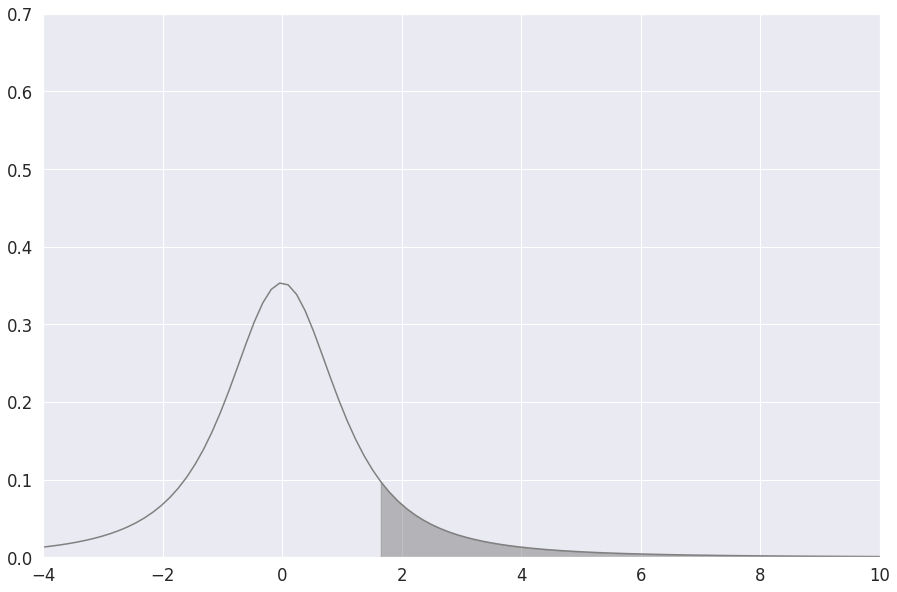

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

x_min =  -4 
x_max = 10

mean = 0 
std = 1

x = np.linspace(x_min, x_max, 100)

y = t.pdf(x, 2)

ax = plt.gca()

plt.xlim(x_min,x_max)
plt.ylim(0,0.7)

plt.plot(x,y, color="0.5")

x2 = np.linspace(1.65, 10, 100)
y2 = t.pdf(x2, 2)
plt.fill_between(x2, y2, color='gray', alpha=0.5)

plt.show()


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
#from colab_pdf import colab_pdf
#colab_pdf('AU2049007.ipynb')